[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/khetansarvesh/Tabular-Cross-Sectional-Modelling/blob/main/modelling/regression/multiple_polynomial_regression/runner.ipynb)

In [ ]:
#importing library to print multiple lines in one code shell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#importing other useful libraries
import numpy as np
import pandas as pd
import math
import random
import matplotlib.pyplot as plt
%matplotlib inline

# cloning required repository for dataset and dependent functions
!git clone https://github.com/khetansarvesh/Tabular-Cross-Sectional-Modelling.git

# renaming the above cloned repo name from Tabular-Cross-Sectional-Modelling to tabular_cross_sectional_modelling
!mv Tabular-Cross-Sectional-Modelling tabular_cross_sectional_modelling

Mounted at /content/drive/


# **Data Preprocessing**

In [ ]:
!wget https://github.com/khetansarvesh/Tabular-Cross-Sectional-Modelling/dataset/insurance.txt

### Reading Dataset

In [ ]:
df = pd.read_csv('insurance.txt')
df
df.shape

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


(1338, 4)

### Generating polynomial degree datasets and then normalizing datasets

In [ ]:
def poly(dataset , degree):

  from sklearn.preprocessing import PolynomialFeatures

  #generating polynomial features using sklear.preprocessing library
  arr = np.array(dataset)
  poly = PolynomialFeatures(degree = degree , include_bias= False)
  df_poly = pd.DataFrame(poly.fit_transform(arr),columns=poly.get_feature_names(dataset.columns))

  #normalizing
  #ensuring first polynomial features are developed and then normalizing so that if one normalizes before there might be case that
  #some feature with value say 0.000001 when made power to 10 might turn to 0 and some values like 1.111 when done power to 10
  #might turn to huge value .Formula used for normalization is as follows X -> (X - mean)/(standard deviation)
  col_names = np.array(df_poly.columns)
  for i in col_names:
    col = np.array(df_poly[i])
    mean_col = np.mean(col)
    std_col = np.std(col)
    norm_col = []
    for j in col:
        norm_col.append((j-mean_col)/std_col)
    df_poly[i] = norm_col

  #adding bias column
  #bias = [1 for i in range(1338)]
  #df_poly.insert(loc = 0 , column = "bias" , value = bias )

  return df_poly

In [ ]:
#dfi_x represent all independent features of i degree
df1_x = poly(df.iloc[:,[0,1,2]] , 1)
df2_x = poly(df.iloc[:,[0,1,2]] , 2)
df3_x = poly(df.iloc[:,[0,1,2]] , 3)
df4_x = poly(df.iloc[:,[0,1,2]] , 4)
df5_x = poly(df.iloc[:,[0,1,2]] , 5)
df6_x = poly(df.iloc[:,[0,1,2]] , 6)
df7_x = poly(df.iloc[:,[0,1,2]] , 7)
df8_x = poly(df.iloc[:,[0,1,2]] , 8)
df9_x = poly(df.iloc[:,[0,1,2]] , 9)
df10_x = poly(df.iloc[:,[0,1,2]] , 10)

In [ ]:
#adding normalized dependent feature to all dfi_x and hence getting dfi which represent dependent and independent features of i degree
col = np.array(df.iloc[:,[2]])
mean_col = np.mean(col)
std_col = np.std(col)
norm_col_charges = []
for j in col:
  norm_col_charges.append((j-mean_col)/std_col)

df1_x['charges'] = np.array(norm_col_charges)
df1 = df1_x
df1
df2_x['charges'] = np.array(norm_col_charges)
df2 = df2_x
df2
df3_x['charges'] = np.array(norm_col_charges)
df3 = df3_x
df3
df4_x['charges'] = np.array(norm_col_charges)
df4 = df4_x
df4
df5_x['charges'] = np.array(norm_col_charges)
df5 = df5_x
df5
df6_x['charges'] = np.array(norm_col_charges)
df6 = df6_x
df6
df7_x['charges'] = np.array(norm_col_charges)
df7 = df7_x
df7
df8_x['charges'] = np.array(norm_col_charges)
df8 = df8_x
df8
df9_x['charges'] = np.array(norm_col_charges)
df9 = df9_x
df9
df10_x['charges'] = np.array(norm_col_charges)
df10 = df10_x
df10

,age,bmi,children,charges
0,-1.438764,-0.453320,-0.908614,-0.908614
1,-1.509965,0.509621,-0.078767,-0.078767
2,-0.797954,0.383307,1.580926,1.580926
3,-0.441948,-1.305531,-0.908614,-0.908614
4,-0.513149,-0.292556,-0.908614,-0.908614
...,...,...,...,...
1333,0.768473,0.050297,1.580926,1.580926
1334,-1.509965,0.206139,-0.908614,-0.908614
1335,-1.509965,1.014878,-0.908614,-0.908614
1336,-1.296362,-0.797813,-0.908614,-0.908614


,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.908614
4,-0.513149,-0.292556,-0.908614,-0.631311,-0.550170,-0.846856,-0.369724,-0.880362,-0.611722,-0.908614
...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.680283,0.644938,2.063486,-0.047104,1.549107,1.465063,1.580926
1334,-1.509965,0.206139,-0.908614,-1.253341,-1.219371,-0.846856,0.106991,-0.880362,-0.611722,-0.908614
1335,-1.509965,1.014878,-0.908614,-1.253341,-1.049506,-0.846856,0.981425,-0.880362,-0.611722,-0.908614
1336,-1.296362,-0.797813,-0.908614,-1.149373,-1.282080,-0.846856,-0.804095,-0.880362,-0.611722,-0.908614


,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.908614
4,-0.513149,-0.292556,-0.908614,-0.631311,-0.550170,-0.846856,-0.369724,-0.880362,-0.611722,-0.688302,-0.639585,-0.733220,-0.549078,-0.810784,-0.594628,-0.422335,-0.805946,-0.601006,-0.428805,-0.908614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.680283,0.644938,2.063486,-0.047104,1.549107,1.465063,0.559998,0.615520,2.169234,0.409674,1.971466,1.944379,-0.133952,1.349296,1.457274,1.070372,1.580926
1334,-1.509965,0.206139,-0.908614,-1.253341,-1.219371,-0.846856,0.106991,-0.880362,-0.611722,-1.052863,-1.143995,-0.733220,-0.925495,-0.810784,-0.594628,0.010738,-0.805946,-0.601006,-0.428805,-0.908614
1335,-1.509965,1.014878,-0.908614,-1.253341,-1.049506,-0.846856,0.981425,-0.880362,-0.611722,-1.052863,-1.102099,-0.733220,-0.650382,-0.810784,-0.594628,0.910041,-0.805946,-0.601006,-0.428805,-0.908614
1336,-1.296362,-0.797813,-0.908614,-1.149373,-1.282080,-0.846856,-0.804095,-0.880362,-0.611722,-1.006454,-1.116829,-0.733220,-1.122117,-0.810784,-0.594628,-0.777299,-0.805946,-0.601006,-0.428805,-0.908614


,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.908614
4,-0.513149,-0.292556,-0.908614,-0.631311,-0.550170,-0.846856,-0.369724,-0.880362,-0.611722,-0.688302,-0.639585,-0.733220,-0.549078,-0.810784,-0.594628,-0.422335,-0.805946,-0.601006,-0.428805,-0.698987,-0.680788,-0.630507,-0.619834,-0.699151,-0.541170,-0.541368,-0.739749,-0.576153,-0.429682,-0.448889,-0.710562,-0.561172,-0.424199,-0.316965,-0.908614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.680283,0.644938,2.063486,-0.047104,1.549107,1.465063,0.559998,0.615520,2.169234,0.409674,1.971466,1.944379,-0.133952,1.349296,1.457274,1.070372,0.427976,0.512324,2.060382,0.459249,2.042855,2.128205,0.201100,1.702377,1.882664,1.476130,-0.203308,1.064725,1.304825,1.076248,0.677853,1.580926
1334,-1.509965,0.206139,-0.908614,-1.253341,-1.219371,-0.846856,0.106991,-0.880362,-0.611722,-1.052863,-1.143995,-0.733220,-0.925495,-0.810784,-0.594628,0.010738,-0.805946,-0.601006,-0.428805,-0.903432,-0.990878,-0.630507,-0.986071,-0.699151,-0.541170,-0.734032,-0.739749,-0.576153,-0.429682,-0.073920,-0.710562,-0.561172,-0.424199,-0.316965,-0.908614
1335,-1.509965,1.014878,-0.908614,-1.253341,-1.049506,-0.846856,0.981425,-0.880362,-0.611722,-1.052863,-1.102099,-0.733220,-0.650382,-0.810784,-0.594628,0.910041,-0.805946,-0.601006,-0.428805,-0.903432,-0.979150,-0.630507,-0.909289,-0.699151,-0.541170,-0.406359,-0.739749,-0.576153,-0.429682,0.808339,-0.710562,-0.561172,-0.424199,-0.316965,-0.908614
1336,-1.296362,-0.797813,-0.908614,-1.149373,-1.282080,-0.846856,-0.804095,-0.880362,-0.611722,-1.006454,-1.116829,-0.733220,-1.122117,-0.810784,-0.594628,-0.777299,-0.805946,-0.601006,-0.428805,-0.884039,-0.969350,-0.630507,-1.011634,-0.699151,-0.541170,-0.967621,-0.739749,-0.576153,-0.429682,-0.725416,-0.710562,-0.561172,-0.424199,-0.316965,-0.908614


,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,age^5,age^4 bmi,age^4 children,age^3 bmi^2,age^3 bmi children,age^3 children^2,age^2 bmi^3,age^2 bmi^2 children,age^2 bmi children^2,age^2 children^3,age bmi^4,age bmi^3 children,age bmi^2 children^2,age bmi children^3,age children^4,bmi^5,bmi^4 children,bmi^3 children^2,bmi^2 children^3,bmi children^4,children^5,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.790958,-0.859071,-0.548477,-0.896053,-0.601060,-0.484407,-0.885340,-0.642064,-0.518972,-0.406908,-0.784503,-0.653570,-0.530379,-0.419171,-0.321919,-0.527368,-0.613583,-0.502908,-0.397561,-0.314363,-0.247903,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.793020,-0.859669,-0.535045,-0.881252,-0.558258,-0.471016,-0.803670,-0.518412,-0.479147,-0.396815,-0.500418,-0.341803,-0.426731,-0.392084,-0.316146,0.115279,0.038467,-0.277369,-0.337269,-0.300874,-0.245312,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,-0.739156,-0.749563,-0.312534,-0.686560,-0.128754,-0.030766,-0.527252,0.215086,0.328544,0.252465,-0.266505,0.704073,0.855285,0.692555,0.405428,0.001473,1.170165,1.391235,1.156933,0.753308,0.381773,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.662073,-0.705868,-0.548477,-0.747260,-0.601060,-0.484407,-0.798938,-0.642064,-0.518972,-0.406908,-0.849990,-0.653570,-0.530379,-0.419171,-0.321919,-0.785987,-0.613583,-0.502908,-0.397561,-0.314363,-0.247903,-0.908614
4,-0.513149,-0.292556,-0.908614,-0.631311,-0.550170,-0.846856,-0.369724,-0.880362,-0.611722,-0.688302,-0.639585,-0.733220,-0.549078,-0.810784,-0.594628,-0.422335,-0.805946,-0.601006,-0.428805,-0.698987,-0.680788,-0.630507,-0.619834,-0.699151,-0.541170,-0.541368,-0.739749,-0.576153,-0.429682,-0.448889,-0.710562,-0.561172,-0.424199,-0.316965,-0.681694,-0.683789,-0.548477,-0.647920,-0.601060,-0.484407,-0.589045,-0.642064,-0.518972,-0.406908,-0.527855,-0.653570,-0.530379,-0.419171,-0.321919,-0.451598,-0.613583,-0.502908,-0.397561,-0.314363,-0.247903,-0.908614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,0.680283,0.644938,2.063486,-0.047104,1.549107,1.465063,0.559998,0.615520,2.169234,0.409674,1.971466,1.944379,-0.133952,1.349296,1.457274,1.070372,0.427976,0.512324,2.060382,0.459249,2.042855,2.128205,0.201100,1.702377,1.882664,1.476130,-0.203308,1.0647

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,age^5,age^4 bmi,age^4 children,age^3 bmi^2,age^3 bmi children,age^3 children^2,...,age bmi^4,age bmi^3 children,age bmi^2 children^2,age bmi children^3,age children^4,bmi^5,bmi^4 children,bmi^3 children^2,bmi^2 children^3,bmi children^4,children^5,age^6,age^5 bmi,age^5 children,age^4 bmi^2,age^4 bmi children,age^4 children^2,age^3 bmi^3,age^3 bmi^2 children,age^3 bmi children^2,age^3 children^3,age^2 bmi^4,age^2 bmi^3 children,age^2 bmi^2 children^2,age^2 bmi children^3,age^2 children^4,age bmi^5,age bmi^4 children,age bmi^3 children^2,age bmi^2 children^3,age bmi children^4,age children^5,bmi^6,bmi^5 children,bmi^4 children^2,bmi^3 children^3,bmi^2 children^4,bmi children^5,children^6,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.790958,-0.859071,-0.548477,-0.896053,-0.601060,-0.484407,...,-0.784503,-0.653570,-0.530379,-0.419171,-0.321919,-0.527368,-0.613583,-0.502908,-0.397561,-0.314363,-0.247903,-0.709416,-0.759719,-0.483636,-0.788220,-0.523503,-0.434011,-0.793050,-0.556402,-0.462067,-0.378371,-0.765861,-0.574121,-0.476044,-0.390948,-0.312055,-0.681880,-0.567083,-0.469019,-0.384663,-0.314989,-0.251813,-0.491206,-0.525345,-0.438595,-0.355370,-0.294076,-0.245832,-0.204859,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.793020,-0.859669,-0.535045,-0.881252,-0.558258,-0.471016,...,-0.500418,-0.341803,-0.426731,-0.392084,-0.316146,0.115279,0.038467,-0.277369,-0.337269,-0.300874,-0.245312,-0.710162,-0.760283,-0.479434,-0.784842,-0.509831,-0.429573,-0.770755,-0.515322,-0.448376,-0.374689,-0.678878,-0.462691,-0.437976,-0.380452,-0.309677,-0.425926,-0.302072,-0.376153,-0.358520,-0.308793,-0.250576,0.030749,0.006563,-0.244592,-0.300232,-0.280641,-0.242974,-0.204326,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,-0.739156,-0.749563,-0.312534,-0.686560,-0.128754,-0.030766,...,-0.266505,0.704073,0.855285,0.692555,0.405428,0.001473,1.170165,1.391235,1.156933,0.753308,0.381773,-0.684549,-0.706311,-0.368805,-0.683228,-0.288833,-0.200161,-0.604429,-0.113428,-0.008838,-0.004172,-0.460650,0.180700,0.315621,0.279112,0.154014,-0.259464,0.560641,0.744180,0.663846,0.447840,0.215740,-0.068166,0.896564,1.153546,1.033831,0.745100,0.432682,0.184057,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.662073,-0.705868,-0.548477,-0.747260,-0.601060,-0.484407,...,-0.849990,-0.653570,-0.530379,-0.419171,-0.321919,-0.785987,-0.613583,-0.502908,-0.397561,-0.314363,-0.247903,-0.638251,-0.671984,-0

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,age^5,age^4 bmi,age^4 children,age^3 bmi^2,age^3 bmi children,age^3 children^2,...,bmi^2 children^4,bmi children^5,children^6,age^7,age^6 bmi,age^6 children,age^5 bmi^2,age^5 bmi children,age^5 children^2,age^4 bmi^3,age^4 bmi^2 children,age^4 bmi children^2,age^4 children^3,age^3 bmi^4,age^3 bmi^3 children,age^3 bmi^2 children^2,age^3 bmi children^3,age^3 children^4,age^2 bmi^5,age^2 bmi^4 children,age^2 bmi^3 children^2,age^2 bmi^2 children^3,age^2 bmi children^4,age^2 children^5,age bmi^6,age bmi^5 children,age bmi^4 children^2,age bmi^3 children^3,age bmi^2 children^4,age bmi children^5,age children^6,bmi^7,bmi^6 children,bmi^5 children^2,bmi^4 children^3,bmi^3 children^4,bmi^2 children^5,bmi children^6,children^7,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.790958,-0.859071,-0.548477,-0.896053,-0.601060,-0.484407,...,-0.294076,-0.245832,-0.204859,-0.646064,-0.683440,-0.431685,-0.702987,-0.462403,-0.391041,-0.707242,-0.488123,-0.413346,-0.350104,-0.695810,-0.503832,-0.424890,-0.359565,-0.298361,-0.664122,-0.504837,-0.421378,-0.354442,-0.299619,-0.245878,-0.595930,-0.488369,-0.404301,-0.335703,-0.287215,-0.246436,-0.206713,-0.445360,-0.449637,-0.377364,-0.307465,-0.261113,-0.229284,-0.202815,-0.177543,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.793020,-0.859669,-0.535045,-0.881252,-0.558258,-0.471016,...,-0.280641,-0.242974,-0.204326,-0.646326,-0.683726,-0.430394,-0.702297,-0.458141,-0.389620,-0.701278,-0.474968,-0.408848,-0.348835,-0.670421,-0.466491,-0.411854,-0.355812,-0.297458,-0.581085,-0.409183,-0.387450,-0.344520,-0.297140,-0.245357,-0.377263,-0.271648,-0.325883,-0.312575,-0.281261,-0.245103,-0.206456,-0.036457,-0.028927,-0.217995,-0.260354,-0.248890,-0.226439,-0.202225,-0.177434,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,-0.739156,-0.749563,-0.312534,-0.686560,-0.128754,-0.030766,...,0.745100,0.432682,0.184057,-0.634359,-0.658001,-0.376830,-0.651969,-0.348606,-0.274502,-0.612530,-0.267455,-0.181714,-0.149380,-0.533811,-0.110365,-0.003208,0.013214,-0.022860,-0.412987,0.128342,0.268103,0.264533,0.175198,0.060708,-0.260573,0.412833,0.596800,0.570701,0.429153,0.246201,0.084517,-0.119149,0.649373,0.900724,0.852413,0.662760,0.430947,0.217319,0.059657,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.662073,-0.705868,-0.548477,-0.747260,-0.601060,-0.484407,...,-0.294076,-0.245832,-0.204859,-0.607299,-0.634600,-0.431685,-0.647621,-0.462403,-0.391041,-0

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,age^5,age^4 bmi,age^4 children,age^3 bmi^2,age^3 bmi children,age^3 children^2,...,age^5 bmi^3,age^5 bmi^2 children,age^5 bmi children^2,age^5 children^3,age^4 bmi^4,age^4 bmi^3 children,age^4 bmi^2 children^2,age^4 bmi children^3,age^4 children^4,age^3 bmi^5,age^3 bmi^4 children,age^3 bmi^3 children^2,age^3 bmi^2 children^3,age^3 bmi children^4,age^3 children^5,age^2 bmi^6,age^2 bmi^5 children,age^2 bmi^4 children^2,age^2 bmi^3 children^3,age^2 bmi^2 children^4,age^2 bmi children^5,age^2 children^6,age bmi^7,age bmi^6 children,age bmi^5 children^2,age bmi^4 children^3,age bmi^3 children^4,age bmi^2 children^5,age bmi children^6,age children^7,bmi^8,bmi^7 children,bmi^6 children^2,bmi^5 children^3,bmi^4 children^4,bmi^3 children^5,bmi^2 children^6,bmi children^7,children^8,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.790958,-0.859071,-0.548477,-0.896053,-0.601060,-0.484407,...,-0.637225,-0.433770,-0.372675,-0.323620,-0.628407,-0.446903,-0.382131,-0.330907,-0.283985,-0.609226,-0.449295,-0.378868,-0.324781,-0.281715,-0.238130,-0.577775,-0.440108,-0.364239,-0.306723,-0.267953,-0.235574,-0.201272,-0.521873,-0.420549,-0.344483,-0.284069,-0.247272,-0.223430,-0.201970,-0.177612,-0.395713,-0.386694,-0.323804,-0.261807,-0.223871,-0.202513,-0.188633,-0.175374,-0.159781,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.793020,-0.859669,-0.535045,-0.881252,-0.558258,-0.471016,...,-0.635676,-0.429660,-0.371242,-0.323199,-0.621170,-0.434852,-0.377849,-0.329630,-0.283661,-0.583908,-0.416874,-0.367224,-0.321273,-0.280798,-0.237926,-0.503825,-0.361099,-0.335657,-0.298088,-0.265639,-0.235029,-0.201162,-0.342520,-0.248433,-0.281075,-0.264919,-0.242077,-0.222153,-0.201692,-0.177559,-0.085553,-0.061746,-0.197153,-0.223499,-0.213524,-0.199936,-0.188046,-0.175253,-0.159759,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,-0.739156,-0.749563,-0.312534,-0.686560,-0.128754,-0.030766,...,-0.591154,-0.326541,-0.257878,-0.220275,-0.546689,-0.249369,-0.166651,-0.133623,-0.130059,-0.475009,-0.115453,-0.010770,0.015700,-0.008426,-0.051584,-0.377037,0.070966,0.203352,0.219716,0.165103,0.077344,-0.007747,-0.262202,0.278851,0.446546,0.449362,0.363594,0.237551,0.105806,0.000837,-0.152303,0.442803,0.668738,0.659850,0.540340,0.381811,0.220009,0.081266,-0.016088,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.662073,-0.705868,-0.548477,-0.747260,-0.601060,-0.484407,...,-0.604241,-0.433770,-0.372675,-0.3

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,age^5,age^4 bmi,age^4 children,age^3 bmi^2,age^3 bmi children,age^3 children^2,...,age^4 bmi^4 children,age^4 bmi^3 children^2,age^4 bmi^2 children^3,age^4 bmi children^4,age^4 children^5,age^3 bmi^6,age^3 bmi^5 children,age^3 bmi^4 children^2,age^3 bmi^3 children^3,age^3 bmi^2 children^4,age^3 bmi children^5,age^3 children^6,age^2 bmi^7,age^2 bmi^6 children,age^2 bmi^5 children^2,age^2 bmi^4 children^3,age^2 bmi^3 children^4,age^2 bmi^2 children^5,age^2 bmi children^6,age^2 children^7,age bmi^8,age bmi^7 children,age bmi^6 children^2,age bmi^5 children^3,age bmi^4 children^4,age bmi^3 children^5,age bmi^2 children^6,age bmi children^7,age children^8,bmi^9,bmi^8 children,bmi^7 children^2,bmi^6 children^3,bmi^5 children^4,bmi^4 children^5,bmi^3 children^6,bmi^2 children^7,bmi children^8,children^9,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.790958,-0.859071,-0.548477,-0.896053,-0.601060,-0.484407,...,-0.403641,-0.344119,-0.299687,-0.265239,-0.230496,-0.533596,-0.396939,-0.330425,-0.281457,-0.249221,-0.223340,-0.195107,-0.504252,-0.382820,-0.311173,-0.258142,-0.227053,-0.208424,-0.192253,-0.171711,-0.457461,-0.363915,-0.293233,-0.237579,-0.206153,-0.190622,-0.182319,-0.173103,-0.158546,-0.346706,-0.335175,-0.279141,-0.222373,-0.189021,-0.172717,-0.166068,-0.162728,-0.157458,-0.147919,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.793020,-0.859669,-0.535045,-0.881252,-0.558258,-0.471016,...,-0.393064,-0.340271,-0.298498,-0.264916,-0.230421,-0.510327,-0.369838,-0.320565,-0.278419,-0.248381,-0.223134,-0.195063,-0.441592,-0.319502,-0.288095,-0.251081,-0.225085,-0.207920,-0.192138,-0.171689,-0.315134,-0.230244,-0.243507,-0.222420,-0.201925,-0.189518,-0.182053,-0.173046,-0.158536,-0.118019,-0.088858,-0.180843,-0.192262,-0.180696,-0.170550,-0.165538,-0.162608,-0.157434,-0.147914,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,-0.739156,-0.749563,-0.312534,-0.686560,-0.128754,-0.030766,...,-0.234223,-0.154920,-0.120196,-0.115586,-0.122792,-0.425665,-0.124245,-0.025837,0.006692,-0.004850,-0.038975,-0.075223,-0.347772,0.017418,0.136656,0.162542,0.132958,0.074200,0.005527,-0.052227,-0.260955,0.166875,0.312959,0.329748,0.279619,0.198652,0.105000,0.015843,-0.050156,-0.170256,0.279265,0.473641,0.485560,0.411850,0.307349,0.194478,0.086810,-0.001836,-0.061203,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.662073,-0.705868,-0.548477,-0.747260,-0.601060,-0.484407,...,-0.403641,-

,age,bmi,children,age^2,age bmi,age children,bmi^2,bmi children,children^2,age^3,age^2 bmi,age^2 children,age bmi^2,age bmi children,age children^2,bmi^3,bmi^2 children,bmi children^2,children^3,age^4,age^3 bmi,age^3 children,age^2 bmi^2,age^2 bmi children,age^2 children^2,age bmi^3,age bmi^2 children,age bmi children^2,age children^3,bmi^4,bmi^3 children,bmi^2 children^2,bmi children^3,children^4,age^5,age^4 bmi,age^4 children,age^3 bmi^2,age^3 bmi children,age^3 children^2,...,age^4 children^6,age^3 bmi^7,age^3 bmi^6 children,age^3 bmi^5 children^2,age^3 bmi^4 children^3,age^3 bmi^3 children^4,age^3 bmi^2 children^5,age^3 bmi children^6,age^3 children^7,age^2 bmi^8,age^2 bmi^7 children,age^2 bmi^6 children^2,age^2 bmi^5 children^3,age^2 bmi^4 children^4,age^2 bmi^3 children^5,age^2 bmi^2 children^6,age^2 bmi children^7,age^2 children^8,age bmi^9,age bmi^8 children,age bmi^7 children^2,age bmi^6 children^3,age bmi^5 children^4,age bmi^4 children^5,age bmi^3 children^6,age bmi^2 children^7,age bmi children^8,age children^9,bmi^10,bmi^9 children,bmi^8 children^2,bmi^7 children^3,bmi^6 children^4,bmi^5 children^5,bmi^4 children^6,bmi^3 children^7,bmi^2 children^8,bmi children^9,children^10,charges
0,-1.438764,-0.453320,-0.908614,-1.220462,-1.304476,-0.846856,-0.513241,-0.880362,-0.611722,-1.038964,-1.151081,-0.733220,-1.085540,-0.810784,-0.594628,-0.544003,-0.805946,-0.601006,-0.428805,-0.897940,-0.988753,-0.630507,-1.020400,-0.699151,-0.541170,-0.913589,-0.739749,-0.576153,-0.429682,-0.547124,-0.710562,-0.561172,-0.424199,-0.316965,-0.790958,-0.859071,-0.548477,-0.896053,-0.601060,-0.484407,...,-0.189729,-0.467936,-0.349225,-0.284591,-0.237723,-0.210149,-0.194292,-0.181889,-0.165550,-0.441564,-0.333828,-0.265334,-0.215167,-0.187304,-0.174227,-0.168853,-0.163460,-0.152072,-0.401502,-0.317431,-0.251129,-0.199113,-0.170431,-0.157713,-0.154767,-0.155751,-0.154102,-0.145784,-0.301214,-0.293243,-0.242825,-0.190066,-0.159584,-0.145370,-0.141348,-0.143002,-0.145827,-0.145452,-0.139783,-0.908614
1,-1.509965,0.509621,-0.078767,-1.253341,-1.155629,-0.497615,0.420429,0.002677,-0.380968,-1.052863,-1.128273,-0.607834,-0.826882,-0.446729,-0.493068,0.318208,0.048244,-0.351632,-0.373280,-0.903432,-0.986477,-0.588658,-0.958548,-0.569986,-0.502731,-0.622001,-0.391309,-0.468908,-0.404271,0.213383,0.056653,-0.314654,-0.363603,-0.304683,-0.793020,-0.859669,-0.535045,-0.881252,-0.558258,-0.471016,...,-0.189712,-0.447741,-0.327263,-0.276586,-0.235243,-0.209444,-0.194106,-0.181845,-0.165541,-0.390457,-0.284265,-0.247263,-0.209632,-0.185733,-0.173805,-0.168748,-0.163436,-0.152067,-0.291625,-0.215394,-0.212959,-0.187458,-0.167139,-0.156825,-0.154539,-0.155697,-0.154091,-0.145782,-0.136673,-0.109360,-0.167821,-0.166932,-0.153105,-0.143639,-0.140904,-0.142894,-0.145803,-0.145447,-0.139783,-0.078767
2,-0.797954,0.383307,1.580926,-0.844579,-0.550476,0.782936,0.287826,1.708352,1.465063,-0.834690,-0.736661,0.176990,-0.377669,0.849403,0.827216,0.186020,1.641096,1.592189,1.070372,-0.793002,-0.771314,-0.157943,-0.620041,0.217106,0.295946,-0.296692,0.813001,0.891039,0.637573,0.087890,1.437203,1.557465,1.174598,0.677853,-0.739156,-0.749563,-0.312534,-0.686560,-0.128754,-0.030766,...,-0.118958,-0.383360,-0.133280,-0.042941,-0.007848,-0.009590,-0.032246,-0.063710,-0.090742,-0.322236,-0.027682,0.077349,0.107085,0.093376,0.056994,0.008650,-0.041241,-0.079175,-0.255851,0.078508,0.203579,0.227161,0.199155,0.148347,0.086380,0.020378,-0.039197,-0.080268,-0.176461,0.154997,0.318467,0.341430,0.297391,0.229447,0.153596,0.076731,0.005454,-0.051479,-0.087569,1.580926
3,-0.441948,-1.305531,-0.908614,-0.573551,-0.884952,-0.846856,-1.191289,-0.880362,-0.611722,-0.645412,-0.766726,-0.733220,-0.985358,-0.810784,-0.594628,-1.058062,-0.805946,-0.601006,-0.428805,-0.669229,-0.733977,-0.630507,-0.824410,-0.699151,-0.541170,-0.941000,-0.739749,-0.576153,-0.429682,-0.919555,-0.710562,-0.561172,-0.424199,-0.316965,-0.662073,-0.705868,-0.548477,-0.747260,-0.601060,-0.484407,...,-0.189729,-0

# **Data Learning Without Using SKLearn Library**

In [ ]:
#importing evaluation metric class
from tabular_cross_sectional_modelling.modelling.regression.multiple_linear_regression.evaluation_metric import *

## Using Gradient_Descent (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_polynomial_regression.vectorized_gd import *
#creating objects of the user defined class
gradientdescent_regressor = GradientDescent()
m = evaluation_metric()

************************ 1 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [4.54165587e+02 4.14546409e+02 3.78392432e+02 3.45399752e+02
 3.15291193e+02 2.87813948e+02 2.62737438e+02 2.39851341e+02
 2.18963817e+02 1.99899872e+02 1.82499878e+02 1.66618220e+02
 1.52122060e+02 1.38890212e+02 1.26812123e+02 1.15786930e+02
 1.05722612e+02 9.65352122e+01 8.81481301e+01 8.04914732e+01
 7.35014693e+01 6.71199287e+01 6.12937542e+01 5.59744942e+01
 5.11179353e+01 4.66837300e+01 4.26350586e+01 3.89383192e+01
 3.55628460e+01 3.24806522e+01 2.96661951e+01 2.70961622e+01
 2.47492759e+01 2.26061155e+01 2.06489548e+01 1.88616136e+01
 1.72293227e+01 1.57386005e+01 1.43771405e+01 1.31337086e+01
 1.19980494e+01 1.09608006e+01 1.00134153e+01 9.14809057e+00
 8.35770257e+00 7.63574740e+00 6.97628697e+00 6.37389963e+00
 5.82363516e+00 5.32097368e+00 4.86178817e+00 4.44231021e+00
 4.05909876e+00 3.70901165e+00 3.38917956e+00 3.09698228e+00
 2.83002702e+00 2.58612864e+00 2.36329155e+00 2.15969

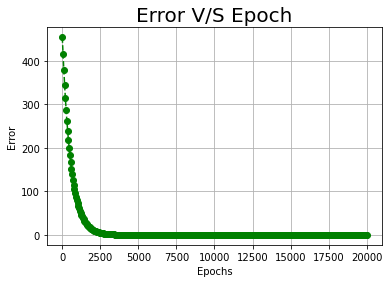

RMSE--Train: 1.95882799145955e-08
MSE--Train: 3.8370071001254557e-16
Total Error--Train: 1.7957193228587132e-13

RMSE--Test: 2.1559525208114185e-08
MSE--Test: 4.64813127199311e-16
Total Error--Test: 9.34274385670615e-14

************************ 2 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [451.96513322 324.15911526 233.42841697 168.94146372 123.05001561
  90.34878626  67.0140868   50.33839092  38.40254802  29.84476292
  23.69764658  19.27318467  16.08146175  13.77318284  12.09898531
  10.88060743   9.99043689   9.33698778   8.85457559   8.49596818
   8.22714842   8.02357693   7.86752192   7.74614863   7.65015053
   7.57276718   7.50907848   7.45549679   7.40940089   7.36887167
   7.33250105   7.29925362   7.26836619   7.23927487   7.21156191
   7.18491697   7.15910883   7.13396468   7.10935489   7.08518188
   7.06137188   7.03786888   7.01463015   6.99162289   6.9688218
   6.94620721   6.92376374   6.90147926   6.87934409   6.85735048
   6.83549214   6.81376391 

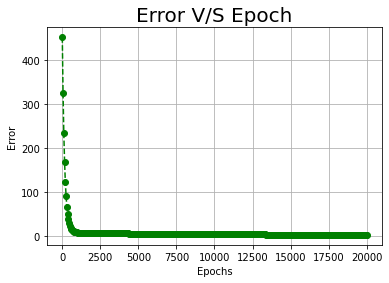

RMSE--Train: 0.07841192758174959
MSE--Train: 0.006148430387085542
Total Error--Train: 2.877465421156034

RMSE--Test: 0.07923168143596021
MSE--Test: 0.006277659343169483
Total Error--Test: 1.261809527977066

************************ 3 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [448.25636832 219.06594714 116.09161993  69.03237867  47.03780034
  36.44372042  31.12742427  28.30607611  26.69311536  25.681839
  24.9796892   24.44212013  23.99585805  23.60276422  23.24244853
  22.90370942  22.58021792  22.26828922  21.96570558  21.67108089
  21.38351076  21.10237611  20.82723089  20.55773683  20.29362474
  20.03467119  19.78068408  19.53149362  19.28694642  19.04690168
  18.81122852  18.57980413  18.35251251  18.12924346  17.90989184
  17.69435708  17.48254266  17.27435579  17.06970714  16.86851057
  16.67068292  16.47614387  16.28481576  16.09662343  15.91149415
  15.72935747  15.55014515  15.37379101  15.20023092  15.02940264
  14.86124582  14.69570186  14.53271388  1

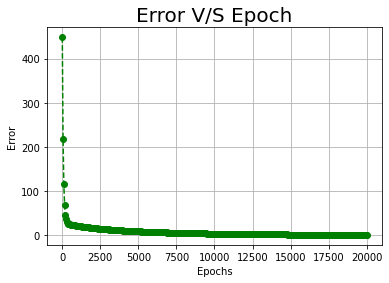

RMSE--Train: 0.0435296655694168
MSE--Train: 0.0018948317845852707
Total Error--Train: 0.8867812751859067

RMSE--Test: 0.04697627099501497
MSE--Test: 0.0022067700365970846
Total Error--Test: 0.443560777356014

************************ 4 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [443.15717713 144.811951    76.22350826  57.62518816  50.97956845
  47.62426716  45.35194847  43.51467904  41.89275029  40.40147601
  39.00415533  37.68276886  36.42712353  35.23055625  34.08814567
  32.99593032  31.95054541  30.94904048  29.98877855  29.06737443
  28.1826532   27.33262017  26.51543774  25.72940694  24.97295226
  24.2446089   23.54301191  22.86688675  22.21504116  21.58635794
  20.97978857  20.39434757  19.82910745  19.28319417  18.75578305
  18.24609513  17.75339384  17.27698194  16.81619884  16.37041807
  15.939045    15.52151476  15.11729033  14.72586081  14.34673977
  13.97946375  13.62359096  13.27869993  12.94438839  12.62027216
  12.30598412  12.00117332  11.7055040

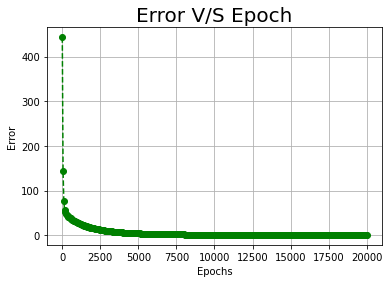

RMSE--Train: 0.03983274273215963
MSE--Train: 0.0015866473935664158
Total Error--Train: 0.7425509801890826

RMSE--Test: 0.03955289496935048
MSE--Test: 0.0015644315004564708
Total Error--Test: 0.31445073159175063

************************ 5 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [436.9162512  117.09379173  81.70754929  71.56086898  65.41139157
  60.49915266  56.21767667  52.37305445  48.87949744  45.68603991
  42.75595198  40.06008711  37.57425144  35.27788167  33.15323614
  31.18483729  29.3590622   27.6638313   26.08836614  24.62299763
  23.25901206  21.98852579  20.80438196  19.70006453  18.66962585
  17.7076252   16.80907598  15.96940011  15.18438835  14.45016541
  13.76315927  13.12007394  12.51786514  11.95371868  11.42503088
  10.92939102  10.46456553  10.02848355   9.61922393   9.23500339
   8.87416564   8.53517161   8.21659039   7.91709103   7.63543493
   7.370469     7.12111927   6.88638503   6.66533352   6.45709496
   6.26085802   6.07586561   5.9014

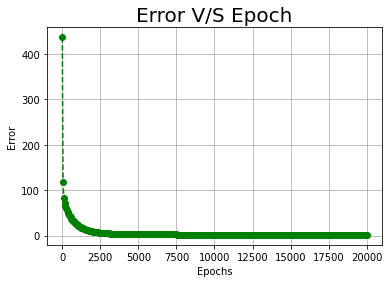

RMSE--Train: 0.05633127342933326
MSE--Train: 0.003173212366170307
Total Error--Train: 1.4850633873677037

RMSE--Test: 0.05603536635758478
MSE--Test: 0.003139962282828744
Total Error--Test: 0.6311324188485775

************************ 6 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [429.84132932 119.55883726  94.38017517  81.23366123  71.14543306
  62.77584528  55.6678102   49.56841698  44.30208241  39.73560283
  35.7635298   32.30013829  29.27442199  26.62676332  24.30661088
  22.2707926   20.48224543  18.90902866  17.52353736  16.30186228
  15.22326046  14.26971209  13.42554604  12.67712137  12.01255494
  11.42148769  10.89488343  10.4248553   10.00451571   9.6278466
   9.28958697   8.98513533   8.71046509   8.46205099   8.23680522
   8.03202183   7.84532836   7.67464369   7.51814138   7.3742177
   7.24146368   7.11864087   7.00466002   6.89856261   6.7995046
   6.70674235   6.61962018   6.5375596    6.46004986   6.38663963
   6.31692979   6.25056708   6.18723854  

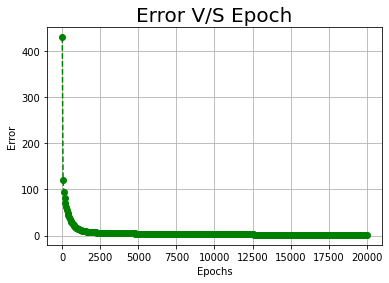

RMSE--Train: 0.05751629454588378
MSE--Train: 0.0033081241382888604
Total Error--Train: 1.5482020967191867

RMSE--Test: 0.06024762025414343
MSE--Test: 0.0036297757462874737
Total Error--Test: 0.7295849250037822

************************ 7 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [422.25360336 129.70931886  99.90632724  80.80894903  66.59835294
  55.63617401  47.0491527   40.26295357  34.8675528   30.55746979
  27.09950862  24.31314788  22.05751277  20.22214863  18.72020428
  17.48326191  16.45735392  15.59986609  14.87711706  14.26246056
  13.73479469  13.27738967  12.87696529  12.52296453  12.20698136
  11.92230988  11.66358891  11.42652172  11.20765501  11.00420441
  10.81391685  10.63496169  10.46584482  10.30534067  10.1524384
  10.00629929   9.86622303   9.73162081   9.60199412   9.47691776
   9.35602633   9.23900346   9.12557318   9.01549298   8.90854826
   8.80454785   8.70332032   8.6047111    8.50857999   8.41479925
   8.3232519    8.23383042   8.146435

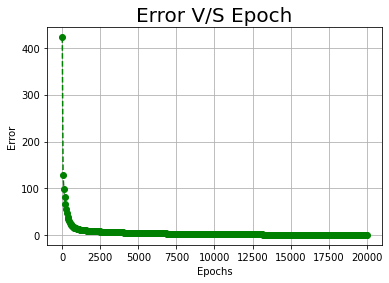

RMSE--Train: 0.047943829415207154
MSE--Train: 0.0022986107789944826
Total Error--Train: 1.0757498445694178

RMSE--Test: 0.05279047336099922
MSE--Test: 0.0027868340776783687
Total Error--Test: 0.5601536496133521

************************ 8 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [414.45480736 135.44515484  96.78275851  73.24476848  57.53707105
  46.71000352  39.10316242  33.67320216  29.73341313  26.82228391
  24.62648557  22.93205177  21.59224156  20.50601109  19.60347271
  18.8360329   18.16968749  17.58045546  17.05126472  16.56982456
  16.12716975  15.71666194  15.33330301  14.9732614   14.63354392
  14.31176745  14.005999    13.71464292  13.43636065  13.17001306
  12.91461843  12.66932157  12.43337062  12.20609945  11.98691401
  11.77528163  11.57072241  11.37280227  11.18112718  10.99533837
  10.81510821  10.6401368   10.47014893  10.30489149  10.14413121
   9.98765267   9.83525652   9.68675796   9.54198535   9.40077897
   9.26298995   9.12847929   8.9971

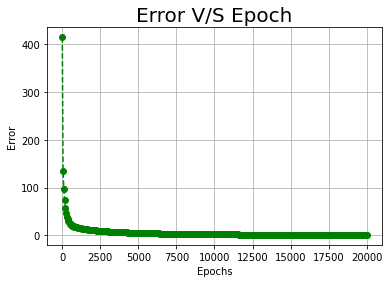

RMSE--Train: 0.04185841580673722
MSE--Train: 0.0017521269738497085
Total Error--Train: 0.8199954237616636

RMSE--Test: 0.04522388577380633
MSE--Test: 0.0020451998444822824
Total Error--Test: 0.41108516874093876

************************ 9 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [406.7072218  134.33821545  89.07266499  65.06362885  51.07316062
  42.47414891  36.91899966  33.13325532  30.40511119  28.32968596
  26.6726138   25.29545492  24.11438921  23.07712923  22.1499001
  21.31002296  20.54163925  19.83320948  19.17602342  18.56329295
  17.98958519  17.45045732  16.94221341  16.46173686  16.00637075
  15.57382984  15.16213375  14.76955518  14.39457887  14.03586859
  13.69224026  13.36263982  13.04612488  12.74184937  12.44905071
  12.16703896  11.89518758  11.63292568  11.3797313   11.13512574
  10.8986686   10.66995363  10.44860497  10.23427407  10.02663689
   9.82539145   9.63025581   9.44096611   9.25727502   9.07895024
   8.90577325   8.73753815   8.57405

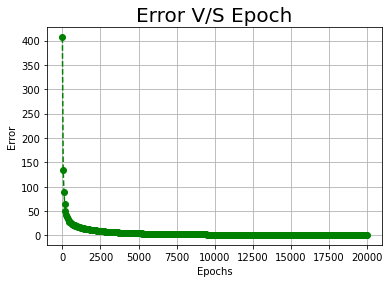

RMSE--Train: 0.045318053025225694
MSE--Train: 0.0020537259299971676
Total Error--Train: 0.9611437352386745

RMSE--Test: 0.04729439719147853
MSE--Test: 0.002236760005705332
Total Error--Test: 0.4495887611467717

************************ 10 DEGREE POLYNOMIAL************************
Error Every 50 Epochs : [399.2283719  128.69529791  81.95773123  60.78412733  49.67213138
  43.07776513  38.68450998  35.45998787  32.91759186  30.81249511
  29.01175802  27.43702632  26.03831538  24.78147217  23.64184903
  22.60090821  21.64427428  20.76054134  19.9404976   19.17659565
  18.462576    17.79319141  17.16400037  16.57120975  16.01155325
  15.48219652  14.98066231  14.50477098  14.05259282  13.62240962
  13.21268335  12.8220306   12.44920139  12.09306177  11.7525791
  11.42680977  11.11488885  10.81602117  10.52947379  10.25456947
   9.99068101   9.73722635   9.49366428   9.25949068   9.03423519
   8.81745825   8.60874854   8.40772055   8.21401261   8.0272849
   7.84721784   7.67351052   7.505879

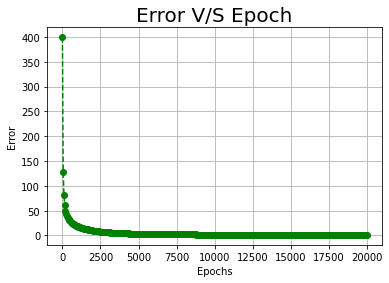

RMSE--Train: 0.05007384888632271
MSE--Train: 0.0025073903422902816
Total Error--Train: 1.1734586801918518

RMSE--Test: 0.05250620608333792
MSE--Test: 0.002756901677265952
Total Error--Test: 0.5541372371304564



In [ ]:
#training different degree polynomials
def training(df):

  #test train split
  df_train = df.iloc[0:936]
  df_test = df.iloc[936:]
  x_train = np.array(df_train.iloc[:,:-1])
  y_train = np.array(df_train.iloc[:,-1])
  x_test = np.array(df_test.iloc[:,:-1])
  y_test = np.array(df_test.iloc[:,-1])

  #training
  gradientdescent_regressor.fit(x_train,y_train,0.000001,20000)
  coef = gradientdescent_regressor.coef_()
  error_every_50_iteration = gradientdescent_regressor.error_every_50_iteration()
  print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = gradientdescent_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

  #calculating accuracy for testing dataset
  y_pred_test = gradientdescent_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

print("************************ 1 DEGREE POLYNOMIAL************************")
training(df1)

print("************************ 2 DEGREE POLYNOMIAL************************")
training(df2)

print("************************ 3 DEGREE POLYNOMIAL************************")
training(df3)

print("************************ 4 DEGREE POLYNOMIAL************************")
training(df4)

print("************************ 5 DEGREE POLYNOMIAL************************")
training(df5)

print("************************ 6 DEGREE POLYNOMIAL************************")
training(df6)

print("************************ 7 DEGREE POLYNOMIAL************************")
training(df7)

print("************************ 8 DEGREE POLYNOMIAL************************")
training(df8)

print("************************ 9 DEGREE POLYNOMIAL************************")
training(df9)

print("************************ 10 DEGREE POLYNOMIAL************************")
training(df10)

## Using Stochastic_Gradient_Descent (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_polynomial_regression.vectorized_sgd import *
#creating objects of the user defined class
stochasticgradientdescent_regressor = StochasticGradientDescent()
m = evaluation_metric()

************************ 1 DEGREE POLYNOMIAL************************
Cofficients : [-0.00555505  0.0087601   0.00944228  0.85963193]


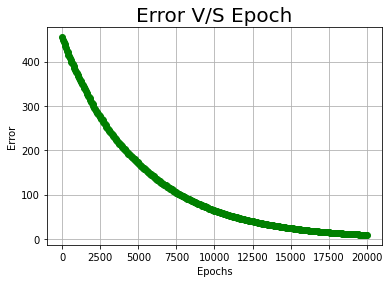

RMSE--Train: 0.13844274012497862
MSE--Train: 0.01916639229331237
Total Error--Train: 8.969871593270188

RMSE--Test: 0.14562936535295676
MSE--Test: 0.021207912053104964
Total Error--Test: 4.262790322674098

************************ 2 DEGREE POLYNOMIAL************************
Cofficients : [-0.00401237 -0.00824382 -0.02133754  0.29886066 -0.02690599 -0.0155464
  0.23400794 -0.02019353  0.26897651  0.21505647]


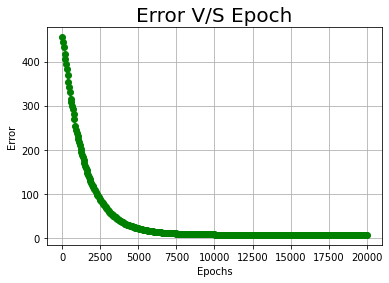

RMSE--Train: 0.12222949460869229
MSE--Train: 0.014940049352296337
Total Error--Train: 6.991943096874685

RMSE--Test: 0.1252719003422585
MSE--Test: 0.01569304901536074
Total Error--Test: 3.154302852087509

************************ 3 DEGREE POLYNOMIAL************************
Cofficients : [ 5.09416358e-04  6.67438793e-06 -2.40947853e-02  2.15763648e-01
 -1.59419481e-02 -9.51813555e-03  1.30554156e-01 -2.34026128e-02
  1.66822141e-01  1.12345408e-01 -2.71952665e-02 -1.83655720e-02
  6.15724963e-02 -1.44278472e-02  8.51889167e-02  4.74465272e-02
 -2.28048248e-02  1.12618675e-01  6.95784411e-02  4.25146774e-02]


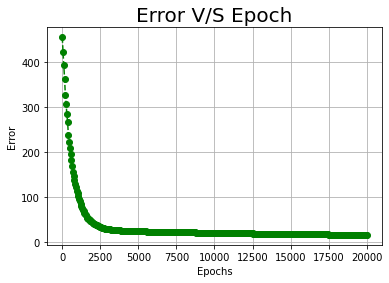

RMSE--Train: 0.18810871072476862
MSE--Train: 0.03538488705053468
Total Error--Train: 16.56012713965023

RMSE--Test: 0.18507892118783983
MSE--Test: 0.03425420706805463
Total Error--Test: 6.885095620678982

************************ 4 DEGREE POLYNOMIAL************************
Cofficients : [-0.00299879  0.01181614 -0.02136833  0.22253501 -0.00455743  0.00206177
  0.12741786 -0.02126466  0.16344325  0.11575215 -0.01602556 -0.00605947
  0.05084267 -0.00479881  0.07173061  0.04029745 -0.0212563   0.09942251
  0.06320189  0.04370638 -0.02299384 -0.01370323  0.0020138  -0.00747345
  0.00408401 -0.0190778  -0.00926958  0.01693658 -0.01258745 -0.01778286
 -0.02119112  0.04120119  0.00726788 -0.00325222  0.00056242]


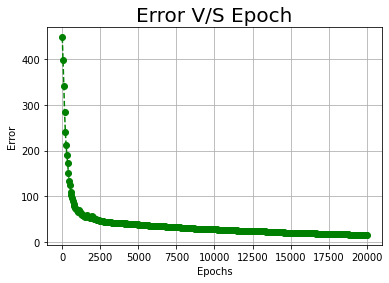

RMSE--Train: 0.18091428976274268
MSE--Train: 0.03272998024035762
Total Error--Train: 15.317630752487366

RMSE--Test: 0.18210667988463414
MSE--Test: 0.033162842858604616
Total Error--Test: 6.665731414579528

************************ 5 DEGREE POLYNOMIAL************************
Cofficients : [-5.58611543e-03  1.26044069e-02 -1.91677943e-02  2.27414473e-01
 -3.19527153e-04  4.56010678e-03  1.38278913e-01 -1.72151077e-02
  1.68940143e-01  1.31241504e-01 -9.02565962e-03 -6.61441514e-04
  6.61102361e-02 -1.23193402e-04  8.33592735e-02  6.30299677e-02
 -1.54643582e-02  1.05415502e-01  8.00467784e-02  6.25298927e-02
 -1.40276470e-02 -5.80991183e-03  1.98632934e-02 -4.60297731e-04
  1.99775129e-02  8.25660742e-03 -2.45325369e-03  2.90563496e-02
  1.16567647e-02  9.26013611e-03 -1.38354157e-02  4.77010514e-02
  2.47224212e-02  1.75202056e-02  1.92061173e-02 -1.63491519e-02
 -8.63452825e-03 -8.18433772e-03 -2.54681946e-03 -1.83071121e-02
 -2.74880847e-02 -1.49821970e-04 -2.32911730e-02 -3.79873978

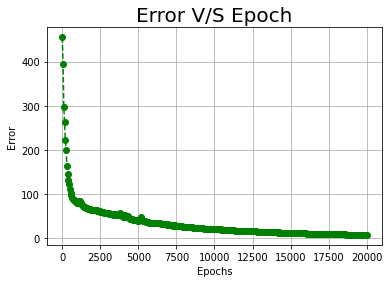

RMSE--Train: 0.1294556646870548
MSE--Train: 0.016758769119567165
Total Error--Train: 7.843103947957434

RMSE--Test: 0.1415870042382965
MSE--Test: 0.020046879769175394
Total Error--Test: 4.029422833604254

************************ 6 DEGREE POLYNOMIAL************************
Cofficients : [-1.29672215e-03  5.44122104e-03 -2.38221351e-02  2.08345864e-01
 -3.34926374e-03 -2.13406909e-04  1.31132885e-01 -1.97893112e-02
  1.57796608e-01  1.23436903e-01 -8.77876547e-03 -1.42202489e-03
  6.86951924e-02 -1.49700473e-03  8.60133629e-02  6.96455477e-02
 -1.58626518e-02  1.04369070e-01  8.35922523e-02  6.44986011e-02
 -1.13813809e-02 -3.57560206e-03  2.86945463e-02  1.47330253e-03
  3.24275111e-02  2.56142498e-02 -6.71911158e-04  4.23463164e-02
  3.15210090e-02  2.65386362e-02 -1.21309124e-02  5.69217800e-02
  4.14695365e-02  3.25728186e-02  2.81618672e-02 -1.20187374e-02
 -4.35135071e-03  4.33573370e-03  1.86143848e-03 -2.14414179e-04
 -3.73414722e-03  4.45989135e-03 -7.99661860e-04 -7.38542949e-

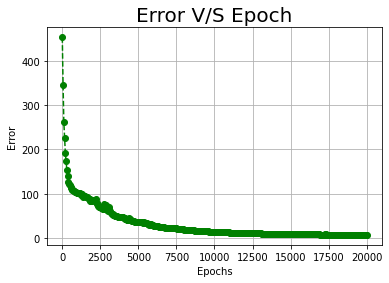

RMSE--Train: 0.12167053021460399
MSE--Train: 0.014803717922702861
Total Error--Train: 6.928139987824939

RMSE--Test: 0.12702079516005346
MSE--Test: 0.016134282403092264
Total Error--Test: 3.2429907630215453

************************ 7 DEGREE POLYNOMIAL************************
Cofficients : [-3.49502907e-03  2.76433832e-03 -2.64006127e-02  1.87990107e-01
 -4.92141562e-03 -4.18193270e-03  1.18960166e-01 -2.20429690e-02
  1.42160234e-01  1.09298140e-01 -9.18382597e-03 -3.90857515e-03
  6.43988804e-02 -5.21306548e-03  8.03882188e-02  6.43455926e-02
 -1.76246586e-02  9.57157080e-02  7.59616431e-02  5.71383706e-02
 -1.06458808e-02 -4.60127471e-03  3.03479596e-02 -9.94801540e-04
  3.53915496e-02  2.87943286e-02 -3.54955320e-03  4.48636865e-02
  3.56089197e-02  2.85072117e-02 -1.32836979e-02  5.61925085e-02
  4.31036697e-02  3.31551905e-02  2.58522557e-02 -1.02178061e-02
 -4.03917078e-03  1.02808418e-02  8.54761503e-04  8.81950639e-03
  5.99721250e-03  2.58810548e-03  1.05197913e-02  6.5598530

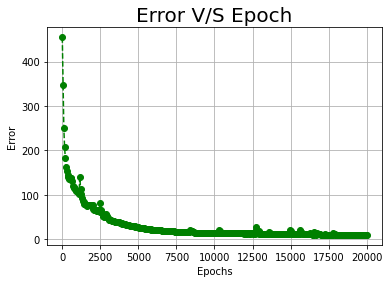

RMSE--Train: 0.14189304362407876
MSE--Train: 0.020133635828904716
Total Error--Train: 9.422541567927407

RMSE--Test: 0.14201269611599482
MSE--Test: 0.02016760585813389
Total Error--Test: 4.053688777484911

************************ 8 DEGREE POLYNOMIAL************************
Cofficients : [-0.0017174   0.00048245 -0.03126004  0.17737961 -0.00672271 -0.00838618
  0.11208667 -0.02562089  0.13282144  0.09799106 -0.01035281 -0.00697835
  0.06166224 -0.00935949  0.07563101  0.0580444  -0.02001622  0.08932583
  0.06796975  0.04805171 -0.01119043 -0.00681919  0.03117783 -0.00440048
  0.03523821  0.02730057 -0.00692578  0.0433921   0.0332236   0.02500617
 -0.01468232  0.05349993  0.04011568  0.0289969   0.01963211 -0.01023191
 -0.00556475  0.01397895 -0.00183273  0.01241978  0.00838335 -0.00054189
  0.01365298  0.00912901  0.00778903 -0.00342151  0.01882891  0.01264229
  0.0099395   0.00706436 -0.00979267  0.02725224  0.0181183   0.01252242
  0.0080217   0.00420152 -0.00828197 -0.00339139  0.00

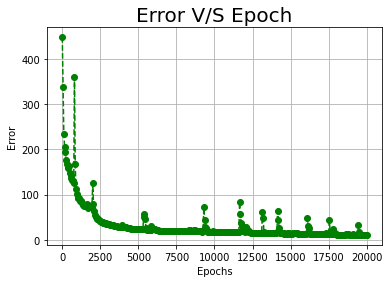

RMSE--Train: 0.15175673077765234
MSE--Train: 0.02303010533632085
Total Error--Train: 10.778089297398157

RMSE--Test: 0.1590175114807797
MSE--Test: 0.0252865689575399
Total Error--Test: 5.08260036046552

************************ 9 DEGREE POLYNOMIAL************************
Cofficients : [ 1.06413198e-03 -6.57127263e-04 -2.94351950e-02  1.79987542e-01
 -7.30769704e-03 -9.99242597e-03  1.12900808e-01 -2.44363975e-02
  1.34004208e-01  9.76199341e-02 -1.05113822e-02 -8.55629228e-03
  6.23150021e-02 -1.15108201e-02  7.58075966e-02  5.62232610e-02
 -1.94264535e-02  8.93718682e-02  6.59845902e-02  4.71796380e-02
 -1.10471865e-02 -8.09919888e-03  3.25008943e-02 -6.96686945e-03
  3.59379041e-02  2.56784380e-02 -9.58271757e-03  4.34184007e-02
  3.11849858e-02  2.26290137e-02 -1.45538747e-02  5.29299423e-02
  3.70474838e-02  2.67661913e-02  1.94141330e-02 -9.88933151e-03
 -6.60205543e-03  1.62297355e-02 -4.26283915e-03  1.42009544e-02
  7.84194909e-03 -3.94704231e-03  1.48871923e-02  8.38016720e-03

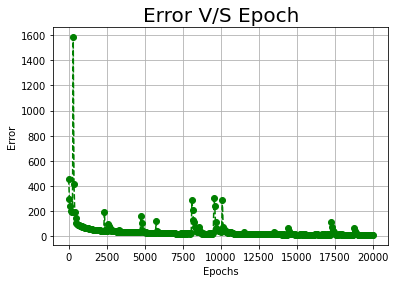

RMSE--Train: 0.16368955826605544
MSE--Train: 0.026794271485336363
Total Error--Train: 12.539719055137418

RMSE--Test: 0.1628265682235045
MSE--Test: 0.02651249131944356
Total Error--Test: 5.329010755208156

************************ 10 DEGREE POLYNOMIAL************************
Cofficients : [-7.51844646e-03  2.68427162e-03 -2.45449093e-02  1.93459824e-01
 -6.34020110e-03 -5.57670614e-03  1.24730622e-01 -2.00323869e-02
  1.39529218e-01  1.10138124e-01 -1.12605533e-02 -7.10434214e-03
  7.08366240e-02 -7.52441162e-03  8.09896974e-02  6.97766294e-02
 -1.54689504e-02  8.83648706e-02  6.57396146e-02  5.88665866e-02
 -1.29002648e-02 -8.64202298e-03  3.86884948e-02 -5.81281685e-03
  3.90269592e-02  3.66687523e-02 -6.46745054e-03  4.36503356e-02
  3.35400357e-02  3.58362599e-02 -1.10485408e-02  4.79936527e-02
  2.75764218e-02  2.44650975e-02  3.02226999e-02 -1.23906732e-02
 -8.38466314e-03  2.14366135e-02 -5.20117673e-03  1.59052499e-02
  1.64548006e-02 -3.53739332e-03  1.43058884e-02  9.69289449

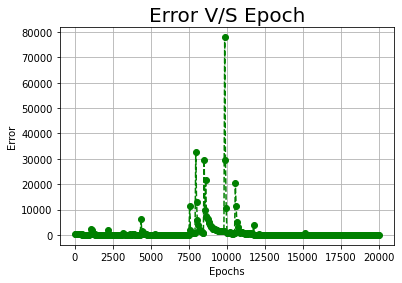

RMSE--Train: 0.14506046949054216
MSE--Train: 0.02104253980881651
Total Error--Train: 9.847908630526126

RMSE--Test: 0.1520372495368541
MSE--Test: 0.02311532524673164
Total Error--Test: 4.64618037459306



In [ ]:
#training different degree polynomials
def training(df):

  #test train split
  df_train = df.iloc[0:936]
  df_test = df.iloc[936:]
  x_train = np.array(df_train.iloc[:,:-1])
  y_train = np.array(df_train.iloc[:,-1])
  x_test = np.array(df_test.iloc[:,:-1])
  y_test = np.array(df_test.iloc[:,-1])

  #training
  stochasticgradientdescent_regressor.fit(x_train,y_train,0.0001,20000)
  coef = stochasticgradientdescent_regressor.coef_()
  error_every_50_iteration = stochasticgradientdescent_regressor.error_every_50_iteration()
  #print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  #print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = stochasticgradientdescent_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

  #calculating accuracy for testing dataset
  y_pred_test = stochasticgradientdescent_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

print("************************ 1 DEGREE POLYNOMIAL************************")
training(df1)

print("************************ 2 DEGREE POLYNOMIAL************************")
training(df2)

print("************************ 3 DEGREE POLYNOMIAL************************")
training(df3)

print("************************ 4 DEGREE POLYNOMIAL************************")
training(df4)

print("************************ 5 DEGREE POLYNOMIAL************************")
training(df5)

print("************************ 6 DEGREE POLYNOMIAL************************")
training(df6)

print("************************ 7 DEGREE POLYNOMIAL************************")
training(df7)

print("************************ 8 DEGREE POLYNOMIAL************************")
training(df8)

print("************************ 9 DEGREE POLYNOMIAL************************")
training(df9)

print("************************ 10 DEGREE POLYNOMIAL************************")
training(df10)

## Using Gradient Descent with Ridge Regularization (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_polynomial_regression.ridge_vectorized_gd import *
#creating objects of the user defined class
gradientdescent_ridge_regressor = GradientDescent_Ridge()
m = evaluation_metric()

************************ 1 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.002026282332057676, 0.8918790231069578], [0.0013842496799942572, 0.608900195666672], [0.0010835820433132378, 0.47650154241447706], [0.0007791562978186594, 0.3425271899320371], [0.0007766712447033004, 0.3414338736011354], [0.0007574236667723115, 0.33296594801482726], [0.0005152401041907711, 0.2264450560835829], [0.0004720872650171327, 0.20747019693880986], [0.00041054704342072127, 0.18041293336466413], [0.00025512409282882353, 0.11209290706842634]]

Training with best hyperparameter found : 0.11209290706842634
Cofficients : [-7.30266148e-06  7.48184462e-06  6.41084318e-06  9.99753045e-01]


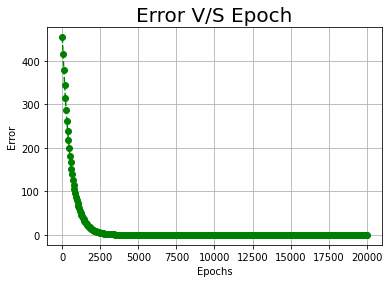

RMSE--Train: 0.00024318491245899995
MSE--Train: 5.913890164769147e-08
Total Error--Train: 2.7677005971119608e-05

RMSE--Test: 0.00025559235893671804
MSE--Test: 6.53274539468361e-08
Total Error--Test: 4.4096031414114365e-06

************************ 2 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.07948603900936145, 0.9852276314359776], [0.0792522867313724, 0.7239738081410807], [0.07910567784561631, 0.5605187469942225], [0.07908544568639521, 0.5379859670120227], [0.07903932276122545, 0.4866401628668725], [0.07884507315566977, 0.2707248862124596], [0.07879938826805198, 0.22002169192675192], [0.07872601163478438, 0.13864599251673315], [0.07870766419206505, 0.11831015284489921], [0.07866211507271223, 0.0678448840604241]]

Training with best hyperparameter found : 0.0678448840604241
Cofficients : [-1.04659723e-03  1.08254807e-02 -2.72725962e-02  5.06633686e-01
 -3.72842578e-02 -1.57660911e-04  1.31500613e-01 -2.30579837e-02
  2.77107626e-01  9

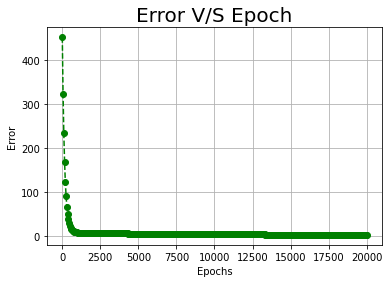

RMSE--Train: 0.07846498228305535
MSE--Train: 0.00615675344468019
Total Error--Train: 2.881360612110329

RMSE--Test: 0.08052212354112928
MSE--Test: 0.006483812379572887
Total Error--Test: 0.4376573356211699

************************ 3 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.04793879052208808, 0.9585813110077549], [0.047858068254614125, 0.9211020946017472], [0.04748035262254217, 0.745836608163412], [0.04745397285294751, 0.733602401804002], [0.04688202990211751, 0.46854174650265756], [0.046803160612054306, 0.43201770637819137], [0.04662203937885167, 0.3481642823000134], [0.046402288514586214, 0.2464677560657632], [0.046268408797914634, 0.18453172294011888], [0.04594778067120921, 0.036261113439416626]]

Training with best hyperparameter found : 0.036261113439416626
Cofficients : [-6.80273001e-04  1.51430001e-02 -1.88948522e-02  5.50338411e-01
 -1.18448976e-02  9.56183397e-03  2.07813068e-01 -1.38933872e-02
  2.71302318e-01  1.96098416e

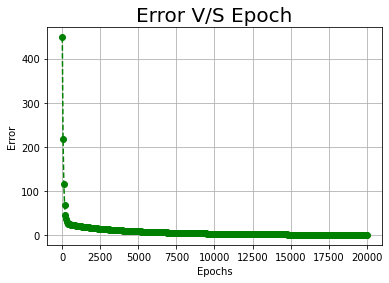

RMSE--Train: 0.043605444508775154
MSE--Train: 0.0019014347908078693
Total Error--Train: 0.8898714820980829

RMSE--Test: 0.04917194548753542
MSE--Test: 0.0024178802230291553
Total Error--Test: 0.163206915054468

************************ 4 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.039873997538518856, 0.91544086300601], [0.0397009905520162, 0.7338768947659868], [0.0395430437604027, 0.5655715549899482], [0.03953407521232421, 0.5559383873840031], [0.03947112531546033, 0.48808470863318076], [0.03938404747493475, 0.3935181687547822], [0.039212406672875316, 0.20460113531922886], [0.03918333701289571, 0.17226037035343889], [0.03915998709873007, 0.14620803430177753], [0.039108547220154964, 0.08857529264691844]]

Training with best hyperparameter found : 0.08857529264691844
Cofficients : [ 2.29091580e-04 -6.33993435e-03 -2.84579650e-02  4.45525098e-01
 -1.28244317e-02 -6.36193148e-03  2.15000930e-01 -1.41313939e-02
  2.63327915e-01  1.99592590e

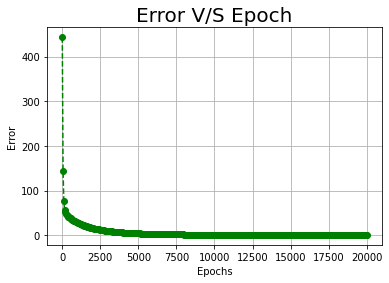

RMSE--Train: 0.03985953204337146
MSE--Train: 0.0015887822947165565
Total Error--Train: 0.7435501139273484

RMSE--Test: 0.040661827608847796
MSE--Test: 0.001653384224491657
Total Error--Test: 0.11160343515318684

************************ 5 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.05568276266852733, 0.9432106634353616], [0.05566724903860092, 0.9241632314405779], [0.05562789372945707, 0.875816903636818], [0.055608973487196935, 0.8525606437076163], [0.05558282140267704, 0.820400630811616], [0.05537665257363481, 0.5662664170539136], [0.055227232425691254, 0.3813977287484088], [0.05514245684126523, 0.27624574574591465], [0.05496227708632212, 0.05210469028960396], [0.05496226958374007, 0.05209533832230262]]

Training with best hyperparameter found : 0.05209533832230262
Cofficients : [ 1.51381362e-04 -1.08916759e-02 -3.81159827e-02  3.81950810e-01
 -1.58152785e-02 -1.67544252e-02  1.89237291e-01 -2.17418816e-02
  2.34134435e-01  1.53159818e

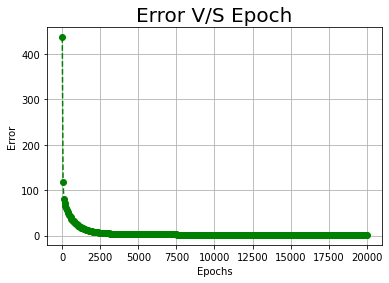

RMSE--Train: 0.05635363834548729
MSE--Train: 0.003175732554773975
Total Error--Train: 1.4862428356342203

RMSE--Test: 0.05822208897882205
MSE--Test: 0.003389811645057872
Total Error--Test: 0.22881228604140635

************************ 6 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.06035586781592808, 0.9931159894770449], [0.060257557902352224, 0.8995444766309304], [0.06022071360191493, 0.864479052102621], [0.059986717848180014, 0.6418153250819262], [0.059852001491800574, 0.513646527984768], [0.059506414941927994, 0.1849132879589911], [0.05949427993864767, 0.17337116771105865], [0.05947562880269258, 0.15563137893258783], [0.05946888698349132, 0.14921901376318714], [0.05945640546642613, 0.13734747376674838]]

Training with best hyperparameter found : 0.13734747376674838
Cofficients : [-5.15383366e-05 -5.07043690e-03 -3.63192533e-02  3.80882155e-01
 -1.38461848e-02 -1.64116818e-02  1.82810883e-01 -2.16692394e-02
  2.30982945e-01  1.39502298

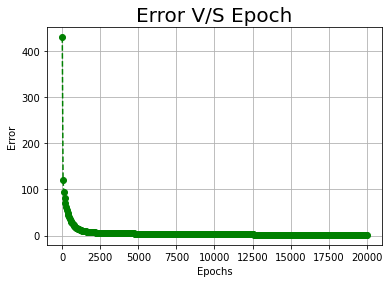

RMSE--Train: 0.05763765209823578
MSE--Train: 0.0033220989393972634
Total Error--Train: 1.5547423036379193

RMSE--Test: 0.06220541184518863
MSE--Test: 0.003869513262829534
Total Error--Test: 0.26119214524099355

************************ 7 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.0531991798213887, 0.8220399885305077], [0.05305661082625356, 0.7172520073612623], [0.052887656738430315, 0.593063597072768], [0.05278412617402968, 0.5169585652184633], [0.05278047933463232, 0.5142776890444569], [0.05274520834902548, 0.4883488086328772], [0.05251989460757641, 0.3226953592866977], [0.05243940207505794, 0.26350752037599623], [0.0523693943063418, 0.21202499882237758], [0.05233168430310914, 0.18429190851758648]]

Training with best hyperparameter found : 0.18429190851758648
Cofficients : [-1.79315713e-05  2.82090272e-03 -3.20025931e-02  3.88236025e-01
 -9.31838200e-03 -1.03304450e-02  1.82327077e-01 -1.86460383e-02
  2.37141703e-01  1.52776435e-01

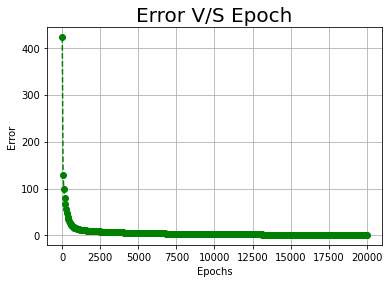

RMSE--Train: 0.04816111694808015
MSE--Train: 0.0023194931856866533
Total Error--Train: 1.0855228109013537

RMSE--Test: 0.054399678348010946
MSE--Test: 0.0029593250043670506
Total Error--Test: 0.19975443779477592

************************ 8 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.04502938177768975, 0.9727018743245391], [0.04476084603116183, 0.7729051289771519], [0.04465795821616205, 0.696116119886444], [0.04462324646600301, 0.6701787259538203], [0.044531958851091125, 0.6018912585249598], [0.04434759510752336, 0.4636373730832112], [0.04423290679818739, 0.37739555294912586], [0.04407236879556096, 0.2563592234072989], [0.04403800921887399, 0.23040485807153477], [0.04383243652050515, 0.07474601583131424]]

Training with best hyperparameter found : 0.07474601583131424
Cofficients : [ 1.15604056e-04  7.22935662e-03 -3.07170194e-02  3.79980246e-01
 -5.45470552e-03 -5.16024012e-03  1.81168972e-01 -1.68924046e-02
  2.35827329e-01  1.62669312

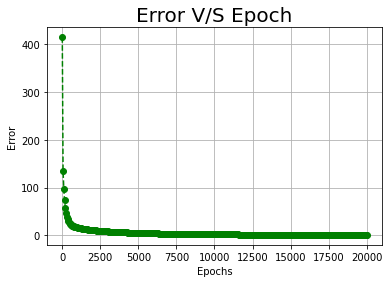

RMSE--Train: 0.041925978770381046
MSE--Train: 0.0017577876958544422
Total Error--Train: 0.8226446416598789

RMSE--Test: 0.0481119684160428
MSE--Test: 0.0023147615048663
Total Error--Test: 0.15624640157847525

************************ 9 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.046357645316851714, 0.9521053611169961], [0.04623073448993817, 0.810651379330242], [0.04610009201057843, 0.6636724491510768], [0.046067484785694286, 0.6267639549827173], [0.0460143229265815, 0.5663924928282541], [0.04574882818530836, 0.26107018857284114], [0.045680389328850116, 0.18127891763576087], [0.04564900110786593, 0.14452793978750922], [0.04563772153970753, 0.13129687831226522], [0.04561524458773018, 0.10489242754262273]]

Training with best hyperparameter found : 0.10489242754262273
Cofficients : [ 1.88473764e-04  6.15069296e-03 -3.35013501e-02  3.61353685e-01
 -4.49761204e-03 -4.77684337e-03  1.77566655e-01 -1.78545329e-02
  2.26739896e-01  1.59340410e

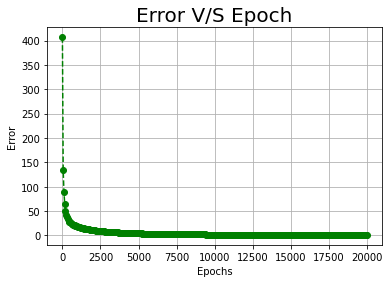

RMSE--Train: 0.04536990985998669
MSE--Train: 0.0020584287207033175
Total Error--Train: 0.9633446412891525

RMSE--Test: 0.05068523763662132
MSE--Test: 0.002568993314280774
Total Error--Test: 0.17340704871395224

************************ 10 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.051378350353474427, 0.9134719235492913], [0.05131213277578383, 0.8208118878243251], [0.05127426752902124, 0.7675936079828556], [0.051178894972368695, 0.63278131682824], [0.05114315317240739, 0.5819687968932655], [0.05110766805900044, 0.5313610558060309], [0.05106909680688308, 0.4761682298531159], [0.05096035093895811, 0.3195033020639908], [0.05090885711612354, 0.24475874007326814], [0.05079674052422881, 0.08072446440270364]]

Training with best hyperparameter found : 0.08072446440270364
Cofficients : [ 2.15973775e-04  2.31216447e-03 -3.79355981e-02  3.46655974e-01
 -5.60918513e-03 -7.41951732e-03  1.73732332e-01 -2.04908833e-02
  2.17890731e-01  1.50650439e-

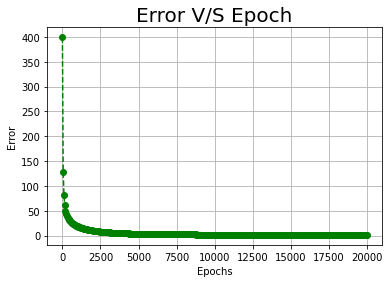

RMSE--Train: 0.05011094495694726
MSE--Train: 0.002511106804478198
Total Error--Train: 1.1751979844957967

RMSE--Test: 0.05588561540289063
MSE--Test: 0.0031232020089598063
Total Error--Test: 0.21081613560478693



In [ ]:
#training different degree polynomials
def training(df):

  #train validation test split
  df_train = df.iloc[0:936]
  df_validation = df.iloc[936:1203]
  df_test = df.iloc[1203:]
  x_train = np.array(df_train.iloc[:,:-1])
  y_train = np.array(df_train.iloc[:,-1])
  x_validation = np.array(df_validation.iloc[:,:-1])
  y_validation = np.array(df_validation.iloc[:,-1])
  x_test = np.array(df_test.iloc[:,:-1])
  y_test = np.array(df_test.iloc[:,-1])

  #hyperparameter tuning
  hyperparameter = np.random.uniform(0,1,10)
  accuracies_hyperparameter = list()
  for i in hyperparameter:
    gradientdescent_ridge_regressor.fit(x_train,y_train,0.000001,20000,i)
    y_pred_validation = gradientdescent_ridge_regressor.predict(x_validation)
    accuracies_hyperparameter.append([m.rmse(y_validation,y_pred_validation),i])
  accuracies_hyperparameter = sorted(accuracies_hyperparameter,key=lambda x : x[0],reverse=True)
  print("[rmse_validation_error , hyperparameter_value] : {}".format(accuracies_hyperparameter))
  best_hyperparameter = accuracies_hyperparameter[9][1]
  print("")

  #training with best regularization parameter
  print("Training with best hyperparameter found : {}".format(best_hyperparameter))
  gradientdescent_ridge_regressor.fit(x_train,y_train,0.000001,20000,best_hyperparameter)
  coef = gradientdescent_ridge_regressor.coef_()
  error_every_50_iteration = gradientdescent_ridge_regressor.error_every_50_iteration()
  #print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  #print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = gradientdescent_ridge_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

  #calculating accuracy for testing dataset
  y_pred_test = gradientdescent_ridge_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

print("************************ 1 DEGREE POLYNOMIAL************************")
training(df1)

print("************************ 2 DEGREE POLYNOMIAL************************")
training(df2)

print("************************ 3 DEGREE POLYNOMIAL************************")
training(df3)

print("************************ 4 DEGREE POLYNOMIAL************************")
training(df4)

print("************************ 5 DEGREE POLYNOMIAL************************")
training(df5)

print("************************ 6 DEGREE POLYNOMIAL************************")
training(df6)

print("************************ 7 DEGREE POLYNOMIAL************************")
training(df7)

print("************************ 8 DEGREE POLYNOMIAL************************")
training(df8)

print("************************ 9 DEGREE POLYNOMIAL************************")
training(df9)

print("************************ 10 DEGREE POLYNOMIAL************************")
training(df10)

## Using Stochastic Gradient Descent with Ridge Regularization (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_polynomial_regression.ridge_vectorized_sgd import *
#creating objects of the user defined class
stochasticgradientdescent_ridge_regressor = StochasticGradientDescent_Ridge()
m = evaluation_metric()

************************ 1 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.009600427917863, 0.9127967630306637], [1.0095589103088736, 0.539782962638518], [1.0094900532022206, 0.8186463227395175], [1.0094707155206704, 0.642249551053589], [1.0094635919969803, 0.5313375930628363], [1.009355996858358, 0.7272318427280244], [1.009273808460121, 0.11417268061431463], [1.009264876460481, 0.4504048818717431], [1.0092319681072999, 0.28521341463166017], [1.0091733738346653, 0.7016651889030204]]

Training with best hyperparameter found : 0.7016651889030204
Cofficients : [-0.0057802   0.01393175  0.00108224  0.40967742]


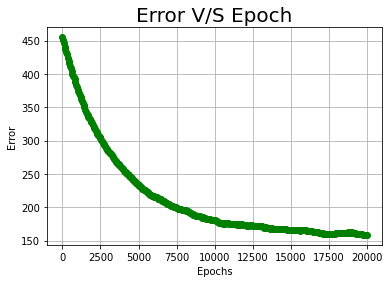

RMSE--Train: 0.5816061583462967
MSE--Train: 0.33826572342633754
Total Error--Train: 158.30835856352596

RMSE--Test: 0.6109833321164491
MSE--Test: 0.37330063212411907
Total Error--Test: 25.19779266837804

************************ 2 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.960188946774624, 0.9061906142901626], [0.9599784731733227, 0.28272687622750237], [0.9596758309898646, 0.22859385377650387], [0.9596231165017646, 0.7381786792369024], [0.9594979111380889, 0.2774169605685911], [0.959473373547622, 0.7236716131835446], [0.9589391161261418, 0.05316599064461991], [0.95884253118902, 0.7009653215198025], [0.958757132432439, 0.6733258781773805], [0.9581012214663311, 0.010436252946013913]]

Training with best hyperparameter found : 0.010436252946013913
Cofficients : [-0.00224847 -0.00761611 -0.02022211  0.29908337 -0.02569391 -0.01599714
  0.23616206 -0.01970181  0.2701754   0.21686104]


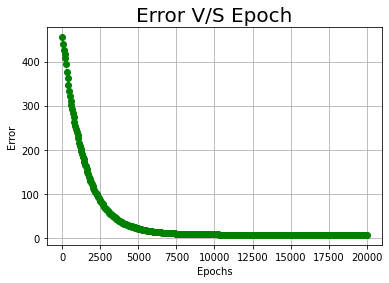

RMSE--Train: 0.12228528278429861
MSE--Train: 0.014953690385635878
Total Error--Train: 6.99832710047759

RMSE--Test: 0.12259153159962087
MSE--Test: 0.015028683619940841
Total Error--Test: 1.0144361443460068

************************ 3 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.8852280374963423, 0.13854934735519187], [0.8848490129291937, 0.26895010325238233], [0.8847834311492504, 0.5220876539218005], [0.8847037801264301, 0.3834638458037958], [0.8830768831731087, 0.5319948621382533], [0.8830607056453537, 0.3930765265827789], [0.8823088008421537, 0.2944397017002398], [0.8814479802358898, 0.6167807904844743], [0.8814093932969234, 0.07672982037911424], [0.8810774959721319, 0.6075013079704914]]

Training with best hyperparameter found : 0.6075013079704914
Cofficients : [-0.00068525 -0.00374845 -0.01518739  0.13885954 -0.01243904 -0.00978551
  0.10194269 -0.01439421  0.11975417  0.09520693 -0.01882276 -0.01496245
  0.06804712 -0.01213459  0.0

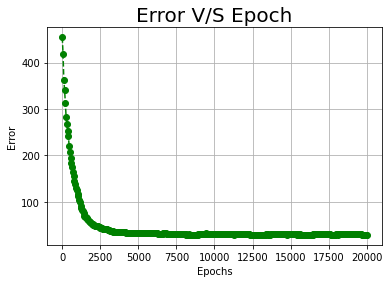

RMSE--Train: 0.2481510824974566
MSE--Train: 0.06157895974465951
Total Error--Train: 28.81895316050065

RMSE--Test: 0.2621371837749795
MSE--Test: 0.06871590311747738
Total Error--Test: 4.638323460429723

************************ 4 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.8039714560186584, 0.8593583216167079], [0.8015890449468979, 0.675860240930222], [0.8012044322358085, 0.1799583124191677], [0.7993165618640309, 0.4808106060938935], [0.7990783468688871, 0.9383701710386793], [0.798617695048242, 0.6497211360302284], [0.7983111158080783, 0.7577830456774404], [0.7964012098829845, 0.38459984485595944], [0.7936955408951571, 0.129952757158042], [0.7925226702081959, 0.12283157299553493]]

Training with best hyperparameter found : 0.12283157299553493
Cofficients : [-4.68454231e-03  8.03521960e-03 -1.93241794e-02  1.93053250e-01
 -5.32970708e-03 -1.37087867e-03  1.14422368e-01 -1.92649461e-02
  1.43888848e-01  1.02438706e-01 -1.47698988e-02 -8.

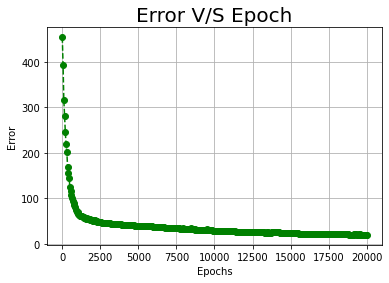

RMSE--Train: 0.20792841480674396
MSE--Train: 0.04323422568404538
Total Error--Train: 20.233617620133238

RMSE--Test: 0.2220939397420851
MSE--Test: 0.04932571807016093
Total Error--Test: 3.3294859697358627

************************ 5 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.727589088036869, 0.8594619456698648], [0.7247748895863065, 0.7602292270753793], [0.724290508431339, 0.7968773109696912], [0.7218229806192488, 0.7352803013199776], [0.7199058260802103, 0.7868419191736266], [0.7193949921506122, 0.49909137800509884], [0.7193822156930606, 0.05318186593967478], [0.7188098711799124, 0.47972935129030914], [0.7176929025651043, 0.18327419023144265], [0.7146687548429961, 0.08970438002808001]]

Training with best hyperparameter found : 0.08970438002808001
Cofficients : [-0.00275844  0.01013854 -0.01892541  0.20163673 -0.00155055  0.00253698
  0.12387957 -0.01724314  0.15057956  0.11795738 -0.00968918 -0.00224231
  0.06055974 -0.00203008  0.0

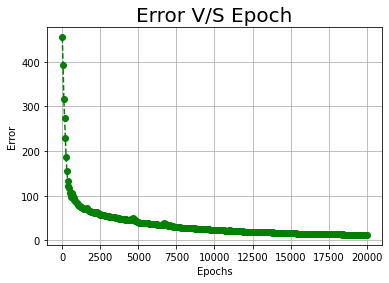

RMSE--Train: 0.16268418252852473
MSE--Train: 0.02646614324497435
Total Error--Train: 12.386155038647995

RMSE--Test: 0.17775553944943825
MSE--Test: 0.0315970318049608
Total Error--Test: 2.1327996468348536

************************ 6 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.6733996113197772, 0.9830150724049734], [0.6723281908477738, 0.7880417969915292], [0.6698673485875347, 0.1959178330112189], [0.6687132163920422, 0.9402973445650281], [0.6683391626321502, 0.6935455450704625], [0.6683268085528568, 0.6036316318058579], [0.6665025089592845, 0.840581170701593], [0.6664120056753988, 0.29537077545049917], [0.6643237840364636, 0.3567713690342983], [0.6638130265839852, 0.2973715045537024]]

Training with best hyperparameter found : 0.2973715045537024
Cofficients : [-2.03798453e-03  4.79526913e-03 -1.64344777e-02  1.51832614e-01
 -2.72029527e-03 -4.26485905e-04  9.89075964e-02 -1.45949768e-02
  1.19206195e-01  9.43259131e-02 -7.65086563e-03 

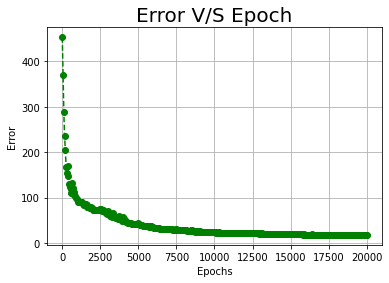

RMSE--Train: 0.19510919809486482
MSE--Train: 0.0380675991812212
Total Error--Train: 17.81563641681152

RMSE--Test: 0.21402470063964765
MSE--Test: 0.04580657248389079
Total Error--Test: 3.0919436426626286

************************ 7 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.6473267742601464, 0.6765679147299235], [0.647103142866182, 0.815770008461118], [0.644640691346543, 0.3300602704293705], [0.6444555222521817, 0.7834394865941992], [0.643659957721965, 0.7345786489323511], [0.6417183384581634, 0.09531121773663132], [0.6398924586137332, 0.5459123169012537], [0.6398038229838865, 0.2901701879558587], [0.6382245413463561, 0.35922012268601433], [0.6379331793647974, 0.23481518899354503]]

Training with best hyperparameter found : 0.23481518899354503
Cofficients : [-2.10747896e-03  3.63187307e-03 -2.07435641e-02  1.50638582e-01
 -3.10460527e-03 -2.67941815e-03  9.90241847e-02 -1.77940930e-02
  1.16926704e-01  9.20416216e-02 -7.22530921e-03 -

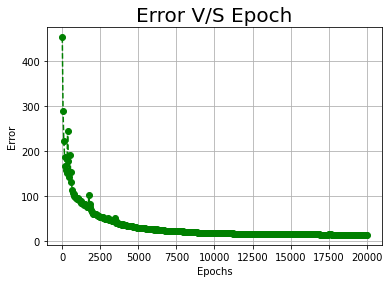

RMSE--Train: 0.17609125020237465
MSE--Train: 0.03100812839783531
Total Error--Train: 14.511804090186924

RMSE--Test: 0.19477454150709428
MSE--Test: 0.03793712201929879
Total Error--Test: 2.560755736302668

************************ 8 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.6482924578754656, 0.8603679415101713], [0.6444814409267308, 0.29751255359863404], [0.6433094591077808, 0.45912687399788465], [0.6390378739244224, 0.4113332237250318], [0.6374322032022373, 0.5411629769026661], [0.6371051572934737, 0.2348249538924584], [0.6370647232936981, 0.7688356573122719], [0.6363700128201059, 0.803384277824241], [0.636334651805096, 0.8220800144133203], [0.6326408200194525, 0.3081957259861636]]

Training with best hyperparameter found : 0.3081957259861636
Cofficients : [-0.00352994  0.00262035 -0.02016644  0.13308448 -0.00339088 -0.00368079
  0.08808793 -0.0172378   0.10409212  0.08035344 -0.00704618 -0.003929
  0.05138981 -0.00531802  0.0634718

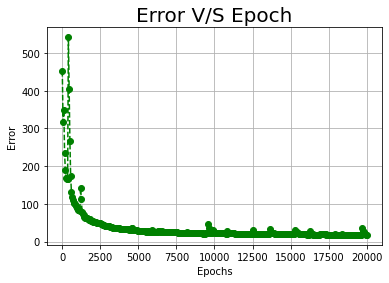

RMSE--Train: 0.1963608292107222
MSE--Train: 0.038557575248322415
Total Error--Train: 18.04494521621489

RMSE--Test: 0.21829097405374975
MSE--Test: 0.047650949353334845
Total Error--Test: 3.216439081350102

************************ 9 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.6555936431885893, 0.6852112049204585], [0.6549432304186321, 0.9213022453141256], [0.6527285330253838, 0.30285318006762796], [0.6525934765336409, 0.05332278369883703], [0.6516347753143814, 0.6289893658358443], [0.6509172168204572, 0.09891081142002178], [0.6452968720279939, 0.09410274517768358], [0.644831264498717, 0.16235947506274062], [0.6431037263369801, 0.09606257258040729], [0.6395452166529424, 0.8879890182877426]]

Training with best hyperparameter found : 0.8879890182877426
Cofficients : [-3.85703500e-03  2.73336048e-03 -1.33424868e-02  8.94336070e-02
 -1.44863951e-03 -1.79177014e-03  6.25159895e-02 -1.17920719e-02
  7.26544657e-02  5.75352664e-02 -4.19588310

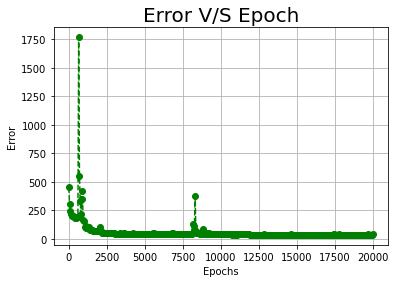

RMSE--Train: 0.2896170541650067
MSE--Train: 0.08387803806321645
Total Error--Train: 39.2549218135853

RMSE--Test: 0.31376059167385084
MSE--Test: 0.09844570888752496
Total Error--Test: 6.645085349907935

************************ 10 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.6584990505542476, 0.6618958053979296], [0.6581375656552305, 0.2658261477332662], [0.6563435111028804, 0.977710530398], [0.6535152552142954, 0.8870518113733579], [0.6532678615315523, 0.7617399232316509], [0.652555475724711, 0.4960954592563872], [0.6488883259705279, 0.6495827998686247], [0.645874944416876, 0.4564106307849648], [0.6435982418142749, 0.4492205873563654], [0.6429099026228233, 0.7902085248926745]]

Training with best hyperparameter found : 0.7902085248926745
Cofficients : [-3.12879687e-03  1.72831970e-03 -1.43573682e-02  9.24158035e-02
 -2.85298478e-03 -3.27414048e-03  6.49069900e-02 -1.27433318e-02
  7.43658027e-02  5.74509284e-02 -5.74330626e-03 -3.88462

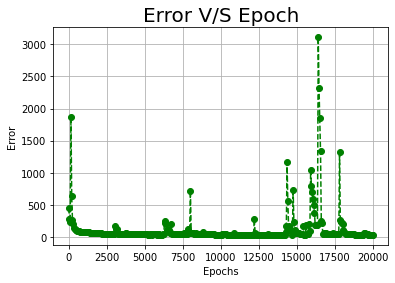

RMSE--Train: 0.26785737352650324
MSE--Train: 0.07174757255251668
Total Error--Train: 33.57786395457781

RMSE--Test: 0.2935034534228627
MSE--Test: 0.08614427717114655
Total Error--Test: 5.814738709052392



In [ ]:
#training different degree polynomials
def training(df):

  #train validation test split
  df_train = df.iloc[0:936]
  df_validation = df.iloc[936:1203]
  df_test = df.iloc[1203:]
  x_train = np.array(df_train.iloc[:,:-1])
  y_train = np.array(df_train.iloc[:,-1])
  x_validation = np.array(df_validation.iloc[:,:-1])
  y_validation = np.array(df_validation.iloc[:,-1])
  x_test = np.array(df_test.iloc[:,:-1])
  y_test = np.array(df_test.iloc[:,-1])

  #hyperparameter tuning
  hyperparameter = np.random.uniform(0,1,10)
  accuracies_hyperparameter = list()
  for i in hyperparameter:
    stochasticgradientdescent_ridge_regressor.fit(x_train,y_train,0.000001,20000,i)
    y_pred_validation = stochasticgradientdescent_ridge_regressor.predict(x_validation)
    accuracies_hyperparameter.append([m.rmse(y_validation,y_pred_validation),i])
  accuracies_hyperparameter = sorted(accuracies_hyperparameter,key=lambda x : x[0],reverse=True)
  print("[rmse_validation_error , hyperparameter_value] : {}".format(accuracies_hyperparameter))
  best_hyperparameter = accuracies_hyperparameter[9][1]
  print("")

  #training with best regularization parameter
  print("Training with best hyperparameter found : {}".format(best_hyperparameter))
  stochasticgradientdescent_ridge_regressor.fit(x_train,y_train,0.0001,20000,best_hyperparameter)
  coef = stochasticgradientdescent_ridge_regressor.coef_()
  error_every_50_iteration = stochasticgradientdescent_ridge_regressor.error_every_50_iteration()
  #print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  #print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = stochasticgradientdescent_ridge_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

  #calculating accuracy for testing dataset
  y_pred_test = stochasticgradientdescent_ridge_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

print("************************ 1 DEGREE POLYNOMIAL************************")
training(df1)

print("************************ 2 DEGREE POLYNOMIAL************************")
training(df2)

print("************************ 3 DEGREE POLYNOMIAL************************")
training(df3)

print("************************ 4 DEGREE POLYNOMIAL************************")
training(df4)

print("************************ 5 DEGREE POLYNOMIAL************************")
training(df5)

print("************************ 6 DEGREE POLYNOMIAL************************")
training(df6)

print("************************ 7 DEGREE POLYNOMIAL************************")
training(df7)

print("************************ 8 DEGREE POLYNOMIAL************************")
training(df8)

print("************************ 9 DEGREE POLYNOMIAL************************")
training(df9)

print("************************ 10 DEGREE POLYNOMIAL************************")
training(df10)

## Using Gradient Descent with Lasso Regularization (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_polynomial_regression.lasso_vectorized_gd import *
#creating objects of the user defined class
gradientdescent_lasso_regressor = GradientDescent_Lasso()
m = evaluation_metric()

************************ 1 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.0009134846196087615, 0.8078796132441468], [0.0008744389233148131, 0.7733204843274262], [0.0008014699704422855, 0.7087421380446017], [0.0007087357596906328, 0.6268238312715956], [0.0005429359552950262, 0.4801555954568968], [0.0005128383552273376, 0.45351871128887], [0.00044025018949170905, 0.38932320723243563], [0.00034730840872186945, 0.30715985109585775], [0.00015440767848820097, 0.1365419833086441], [0.0001049934909875975, 0.09284997471056788]]

Training with best hyperparameter found : 0.09284997471056788
Cofficients : [ 3.41755470e-08  4.91168863e-08 -6.10637856e-08  9.99897953e-01]


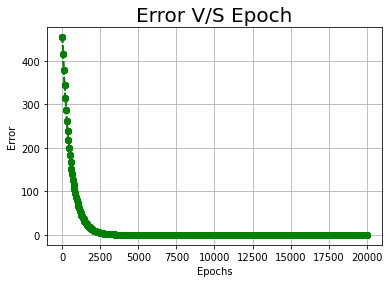

RMSE--Train: 0.00010062046076714633
MSE--Train: 1.0124477124992834e-08
Total Error--Train: 4.738255294496647e-06

RMSE--Test: 0.00010587468292713799
MSE--Test: 1.1209448484922005e-08
Total Error--Test: 7.566377727322353e-07

************************ 2 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.07857525198980517, 0.13930024421628118], [0.07856547085010192, 0.18940089362776724], [0.07855713995440226, 0.23278949773708268], [0.07855535970829135, 0.24218303235994132], [0.07852713719963558, 0.39711987213106803], [0.07851452030891254, 0.4703291736095475], [0.07847841977921761, 0.7111391926365453], [0.07846435470508208, 0.8238151230867912], [0.07843500272288956, 0.9746727542810729], [0.0784340995378563, 0.9786326179276168]]

Training with best hyperparameter found : 0.9786326179276168
Cofficients : [-8.14101106e-05  8.13179638e-05 -2.67562866e-02  5.08560334e-01
 -2.70048097e-02 -3.84288459e-07  1.30991161e-01 -2.24778163e-02
  2.75757384e-01

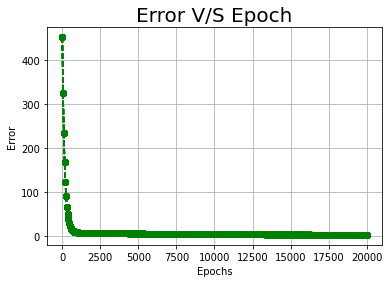

RMSE--Train: 0.07829170489710535
MSE--Train: 0.006129591055695429
Total Error--Train: 2.868648614065461

RMSE--Test: 0.08063379603906597
MSE--Test: 0.006501809063669691
Total Error--Test: 0.43887211179770413

************************ 3 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.047755850358939395, 0.9210225849340883], [0.04753160710957321, 0.8420326613134418], [0.04734704170226961, 0.7763912783640163], [0.04727285355713594, 0.7434413569509362], [0.0469528240384296, 0.6041679584441515], [0.04680623233274065, 0.5372500073453391], [0.04631791606195899, 0.2894151114972021], [0.046224972390984415, 0.23609370858734768], [0.045982172870964406, 0.08216277343098255], [0.04594050766581464, 0.0528731550346776]]

Training with best hyperparameter found : 0.0528731550346776
Cofficients : [-0.0006299   0.01441037 -0.01870229  0.55058493 -0.01109893  0.00880226
  0.2073685  -0.0136978   0.27126879  0.19540562 -0.02575516  0.0008074
 -0.03703139  0.0

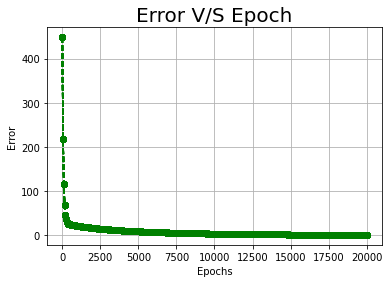

RMSE--Train: 0.04361669671011335
MSE--Train: 0.0019024162319020122
Total Error--Train: 0.8903307965301417

RMSE--Test: 0.04912383497926363
MSE--Test: 0.002413151163069925
Total Error--Test: 0.16288770350721993

************************ 4 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.03965073064158678, 0.85873025019576], [0.039620961823409365, 0.8423148913085592], [0.03919507216048116, 0.5492573320344027], [0.03907881922371395, 0.42453043911553434], [0.039023580134526475, 0.012005294022991997], [0.03902070685831369, 0.017609368550365767], [0.039015859098442685, 0.3219498577675086], [0.03900286162738383, 0.058188708273966494], [0.038981653829190104, 0.18079741858016807], [0.03898153797491097, 0.1889438740320738]]

Training with best hyperparameter found : 0.1889438740320738
Cofficients : [ 5.70176817e-08 -6.64438009e-03 -2.73323286e-02  4.48279067e-01
 -1.00457278e-02 -5.62169333e-03  2.14765908e-01 -1.29190500e-02
  2.63644720e-01  1.9900

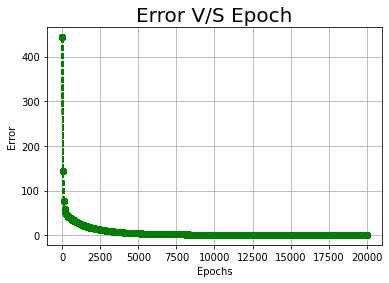

RMSE--Train: 0.03952221137548088
MSE--Train: 0.0015620051920081902
Total Error--Train: 0.731018429859833

RMSE--Test: 0.040419369720574465
MSE--Test: 0.001633725448608492
Total Error--Test: 0.11027646778107322

************************ 5 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.054337312028228904, 0.9655314896336872], [0.05433263289549037, 0.27448866971079], [0.05428039788665278, 0.32585318028553123], [0.05426724390347739, 0.34196636722824325], [0.05425010920415145, 0.36589146153418795], [0.05424839117559647, 0.36855306039088587], [0.0542417517180179, 0.8422646400847422], [0.0542099692017109, 0.4536612741112874], [0.05418009878609041, 0.7099563188693061], [0.05417855136253631, 0.6955803457013505]]

Training with best hyperparameter found : 0.6955803457013505
Cofficients : [ 5.44145193e-07 -1.24053499e-02 -3.63382268e-02  3.93554902e-01
 -1.10175241e-02 -1.21373299e-02  1.89483210e-01 -1.70466565e-02
  2.37854031e-01  1.56215038e-01 

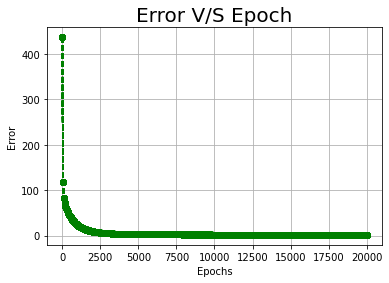

RMSE--Train: 0.05410651757024577
MSE--Train: 0.0029275152435793137
Total Error--Train: 1.3700771339951188

RMSE--Test: 0.05715572470320959
MSE--Test: 0.0032667768663490835
Total Error--Test: 0.22050743847856313

************************ 6 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.05902666278194742, 0.09150819578544722], [0.058785226198622836, 0.1832842383433626], [0.05834018500414305, 0.4254021079513727], [0.058304299240324896, 0.9455467861223912], [0.05828446307979025, 0.9277165129849192], [0.05825934872439214, 0.5145760042602209], [0.058256040015517735, 0.5193769322029567], [0.05819652919288494, 0.8340747195425153], [0.058166266707301156, 0.6912386130864897], [0.0581638256610138, 0.7691002490651464]]

Training with best hyperparameter found : 0.7691002490651464
Cofficients : [-6.55372154e-07 -8.72003251e-03 -3.72190116e-02  3.93322008e-01
 -1.15770821e-02 -1.47315414e-02  1.83871719e-01 -1.82585674e-02
  2.34940747e-01  1.43191563e

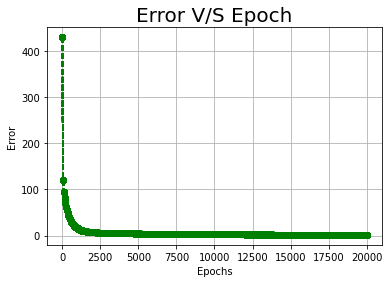

RMSE--Train: 0.05615811847291732
MSE--Train: 0.003153734270418218
Total Error--Train: 1.475947638555726

RMSE--Test: 0.060836891918086236
MSE--Test: 0.003701127418252906
Total Error--Test: 0.24982610073207115

************************ 7 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.05428381202910396, 0.9272856402107632], [0.053650435404249734, 0.7750134715943788], [0.053427766275082535, 0.7147504786160896], [0.05341837640782605, 0.7122097033185029], [0.05317283129808251, 0.6479419253368863], [0.05254412336933434, 0.44812344035812346], [0.052348693628275864, 0.37101712209271376], [0.052128295531379806, 0.24096910208304334], [0.05207881685833546, 0.003139417009205947], [0.05206538200932455, 0.025007902009094862]]

Training with best hyperparameter found : 0.025007902009094862
Cofficients : [ 2.05827362e-08  2.43695228e-03 -3.21344232e-02  3.89317868e-01
 -9.29834446e-03 -1.03981621e-02  1.82638837e-01 -1.86254785e-02
  2.37575523e-01  1.52

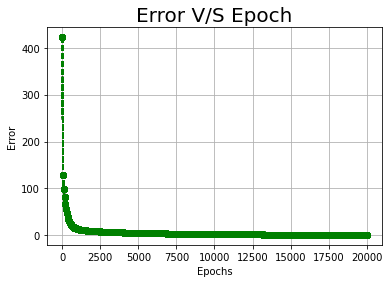

RMSE--Train: 0.0479214215404887
MSE--Train: 0.0022964626424612144
Total Error--Train: 1.0747445166718483

RMSE--Test: 0.05411137957533087
MSE--Test: 0.002928041399545535
Total Error--Test: 0.1976427944693236

************************ 8 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.04869709160406836, 0.9812382849483697], [0.048537812010517684, 0.9582848112795807], [0.04818299028241653, 0.9054273355343315], [0.047121265392786583, 0.7521600686100628], [0.046148251730295346, 0.6112816544131436], [0.04562912860072826, 0.529262384645158], [0.04509639991644904, 0.43170014555731906], [0.04431343157214743, 0.2581788985160489], [0.04383890228493813, 0.09140543477485186], [0.0437578086518704, 0.03320315990880318]]

Training with best hyperparameter found : 0.03320315990880318
Cofficients : [ 7.18307894e-05  6.25007164e-03 -3.08798192e-02  3.80938226e-01
 -5.43276606e-03 -5.27605512e-03  1.81437135e-01 -1.68943703e-02
  2.36205014e-01  1.62703793e-0

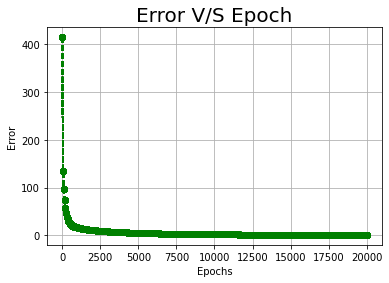

RMSE--Train: 0.04178355579251063
MSE--Train: 0.0017458655346658481
Total Error--Train: 0.817065070223617

RMSE--Test: 0.04791192892226514
MSE--Test: 0.002295552933052187
Total Error--Test: 0.1549498229810226

************************ 9 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.047081894061862875, 0.9109690382951839], [0.046889816261053485, 0.8784286196790477], [0.04688193331942209, 0.8771833342444252], [0.045855125523484336, 0.6969713708502386], [0.04572236816708249, 0.6684064196519933], [0.04566661814018854, 0.6556577538821082], [0.04533474258547145, 0.04037398243832435], [0.044997568455147297, 0.44222804050853504], [0.04483053455619243, 0.22906575839658527], [0.04481744447947435, 0.2810996303095782]]

Training with best hyperparameter found : 0.2810996303095782
Cofficients : [-6.46097155e-08 -6.03838919e-04 -3.31978163e-02  3.69547628e-01
 -3.83533252e-03 -4.25485812e-03  1.79390464e-01 -1.65612010e-02
  2.30348632e-01  1.60252307e

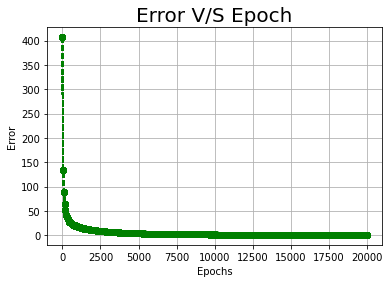

RMSE--Train: 0.04386193692892979
MSE--Train: 0.0019238695111574151
Total Error--Train: 0.9003709312216703

RMSE--Test: 0.0487159476733682
MSE--Test: 0.002373243557714348
Total Error--Test: 0.16019394014571847

************************ 10 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[0.05051330005756443, 0.027581803198944765], [0.04965540771267547, 0.9689904964413576], [0.04953090428658284, 0.19459793532745706], [0.04953077588734122, 0.19463836418318592], [0.04927382389885757, 0.8690679263732728], [0.04923187140447083, 0.8584836995462477], [0.04892604789111168, 0.7766442685221634], [0.04867332443035566, 0.4826297613583762], [0.048635811216435974, 0.6177332252381765], [0.04861794361663296, 0.5643097800322772]]

Training with best hyperparameter found : 0.5643097800322772
Cofficients : [ 2.04153381e-07 -2.99205015e-03 -3.52389468e-02  3.65099786e-01
 -4.58635389e-03 -4.46481664e-03  1.77253171e-01 -1.58526636e-02
  2.26692320e-01  1.54464271e

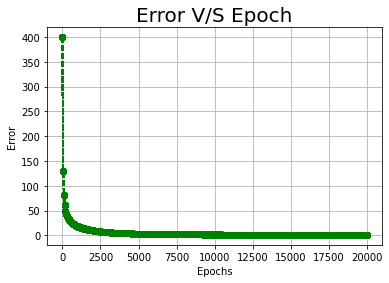

RMSE--Train: 0.04679246367979684
MSE--Train: 0.0021895346572251067
Total Error--Train: 1.02470221958135

RMSE--Test: 0.05199612142329509
MSE--Test: 0.002703596643066047
Total Error--Test: 0.18249277340695816



In [ ]:
#training different degree polynomials
def training(df):

  #train validation test split
  df_train = df.iloc[0:936]
  df_validation = df.iloc[936:1203]
  df_test = df.iloc[1203:]
  x_train = np.array(df_train.iloc[:,:-1])
  y_train = np.array(df_train.iloc[:,-1])
  x_validation = np.array(df_validation.iloc[:,:-1])
  y_validation = np.array(df_validation.iloc[:,-1])
  x_test = np.array(df_test.iloc[:,:-1])
  y_test = np.array(df_test.iloc[:,-1])

  #hyperparameter tuning
  hyperparameter = np.random.uniform(0,1,10)
  accuracies_hyperparameter = list()
  for i in hyperparameter:
    gradientdescent_lasso_regressor.fit(x_train,y_train,0.000001,20000,i)
    y_pred_validation = gradientdescent_lasso_regressor.predict(x_validation)
    accuracies_hyperparameter.append([m.rmse(y_validation,y_pred_validation),i])
  accuracies_hyperparameter = sorted(accuracies_hyperparameter,key=lambda x : x[0],reverse=True)
  print("[rmse_validation_error , hyperparameter_value] : {}".format(accuracies_hyperparameter))
  best_hyperparameter = accuracies_hyperparameter[9][1]
  print("")

  #training with best regularization parameter
  print("Training with best hyperparameter found : {}".format(best_hyperparameter))
  gradientdescent_lasso_regressor.fit(x_train,y_train,0.000001,20000,best_hyperparameter)
  coef = gradientdescent_lasso_regressor.coef_()
  error_every_50_iteration = gradientdescent_lasso_regressor.error_every_50_iteration()
  #print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  #print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = gradientdescent_lasso_regressor.predict(x_train)
  #print(y3_train)
  #print(y3_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

  #calculating accuracy for testing dataset
  y_pred_test = gradientdescent_lasso_regressor.predict(x_test)
  #print(y3_test)
  #print(y3_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

print("************************ 1 DEGREE POLYNOMIAL************************")
training(df1)

print("************************ 2 DEGREE POLYNOMIAL************************")
training(df2)

print("************************ 3 DEGREE POLYNOMIAL************************")
training(df3)

print("************************ 4 DEGREE POLYNOMIAL************************")
training(df4)

print("************************ 5 DEGREE POLYNOMIAL************************")
training(df5)

print("************************ 6 DEGREE POLYNOMIAL************************")
training(df6)

print("************************ 7 DEGREE POLYNOMIAL************************")
training(df7)

print("************************ 8 DEGREE POLYNOMIAL************************")
training(df8)

print("************************ 9 DEGREE POLYNOMIAL************************")
training(df9)

print("************************ 10 DEGREE POLYNOMIAL************************")
training(df10)

## Using Stochastic Gradient Descent with Lasso Regularization (Vectorized Formula)

In [ ]:
from tabular_cross_sectional_modelling.modelling.regression.multiple_polynomial_regression.lasso_vectorized_sgd import *
#creating objects of the user defined class
stochasticgradientdescent_lasso_regressor = StochasticGradientDescent_Lasso()
m = evaluation_metric()

************************ 1 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.028799921646253, 0.9709852763819016], [1.0283245349639936, 0.940559925878318], [1.0281545442452276, 0.9400531106779014], [1.0279411924211117, 0.9096705031375356], [1.027497507800194, 0.9139057271891798], [1.0274953674564244, 0.9104512540877447], [1.0274799888467376, 0.9140842924328624], [1.0228099422452799, 0.6805495225331215], [1.0226882813764342, 0.6608196030567506], [1.0150093229575965, 0.2795859452991558]]

Training with best hyperparameter found : 0.2795859452991558
Cofficients : [ 4.79360679e-05 -1.32161537e-05  8.22582706e-05  6.10277862e-01]


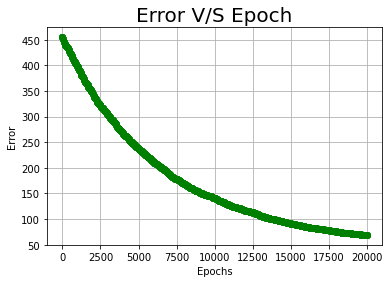

RMSE--Train: 0.38426883189060734
MSE--Train: 0.14766253516257186
Total Error--Train: 69.10606645608362

RMSE--Test: 0.4043547570180676
MSE--Test: 0.1635027695231405
Total Error--Test: 11.036436942811983

************************ 2 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.028592525674255, 0.973890387695972], [1.0279214600576754, 0.9415335043387326], [1.0239947751427492, 0.8694468323190132], [1.005451173688216, 0.6300903342223935], [0.9988826667302854, 0.537567920812647], [0.9980101737870459, 0.523035312575537], [0.9974747739442147, 0.49799750131917553], [0.9851111314102518, 0.34377005945198225], [0.9849380368674915, 0.3416717825191842], [0.9798787186179363, 0.2769386552441905]]

Training with best hyperparameter found : 0.2769386552441905
Cofficients : [ 3.92030211e-05 -6.12610035e-05 -4.39908762e-05  2.36570504e-01
 -3.22524769e-05 -6.02101019e-05  1.47125524e-01 -1.47250790e-05
  2.05436506e-01  1.20577253e-01]


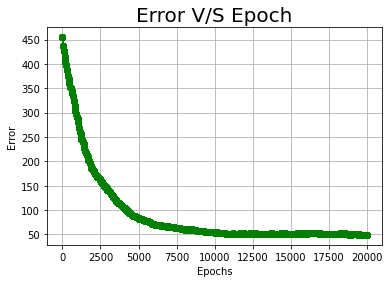

RMSE--Train: 0.32306137241758554
MSE--Train: 0.10436865034833388
Total Error--Train: 48.84452836302026

RMSE--Test: 0.34622263588007995
MSE--Test: 0.11987011359575042
Total Error--Test: 8.091232667713154

************************ 3 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0276705938385633, 0.9507956499880124], [1.0167662524455248, 0.8256509044769078], [1.0060745931859292, 0.7513258043023829], [0.9947842244419692, 0.6702559013486284], [0.9770966842372942, 0.5612207638858165], [0.9595995999144018, 0.4521266547842002], [0.9577909996099617, 0.4547680755776762], [0.9332511589677457, 0.2984949335032141], [0.9264918942866415, 0.2680227866616197], [0.9072812560526377, 0.13229086168253967]]

Training with best hyperparameter found : 0.13229086168253967
Cofficients : [-4.49618693e-05 -5.40843226e-05  1.66624273e-05  2.25929894e-01
 -9.47011032e-05 -6.94827299e-05  1.15282177e-01  4.35566853e-06
  1.59998491e-01  1.08437252e-01 -1.01286227e-04

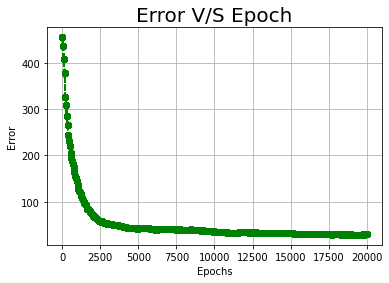

RMSE--Train: 0.25107915897639366
MSE--Train: 0.06304074407229317
Total Error--Train: 29.503068225833204

RMSE--Test: 0.27026052076445173
MSE--Test: 0.07304074908387263
Total Error--Test: 4.930250563161403

************************ 4 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0266128764231344, 0.9083892509931678], [1.0106991375179541, 0.7938066366213209], [0.9664152645272792, 0.5984218184164715], [0.9617679529604644, 0.5667232743717927], [0.9521118592242661, 0.5692897996558214], [0.9107104889922382, 0.41520482717841367], [0.8521657177540601, 0.20569183113989198], [0.8458644143853102, 0.17704078792243072], [0.8288581526107536, 0.11897605492993846], [0.8004118008997771, 0.03723359265322823]]

Training with best hyperparameter found : 0.03723359265322823
Cofficients : [ 6.02819009e-05 -5.30144156e-06 -1.09363367e-02  2.31068272e-01
 -8.53200372e-05 -3.36940587e-04  1.27177354e-01 -1.02299343e-02
  1.64318683e-01  1.14793158e-01 -2.6069525

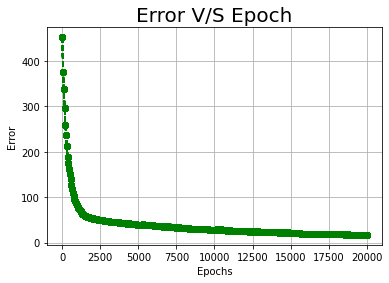

RMSE--Train: 0.1897674346102202
MSE--Train: 0.036011679238544196
Total Error--Train: 16.853465883638684

RMSE--Test: 0.19736251277764436
MSE--Test: 0.038951961449905835
Total Error--Test: 2.6292573978686438

************************ 5 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0264306606913507, 0.9024986547491192], [1.025585800246702, 0.9055210737187043], [0.9873143304743844, 0.6991040169183997], [0.9233774769382781, 0.5425794684287361], [0.9213636368610738, 0.5151751187521952], [0.8776193191437001, 0.4215135664589321], [0.8068104511098421, 0.24089032355068307], [0.7698899602707632, 0.13665036502604355], [0.7554725032458564, 0.1048970751737377], [0.7452360771478289, 0.06939865172883541]]

Training with best hyperparameter found : 0.06939865172883541
Cofficients : [-1.14184862e-04 -2.65148584e-04 -2.47732448e-04  2.38656239e-01
 -2.93139779e-04 -4.27576074e-04  1.27954943e-01 -3.16835201e-04
  1.63718052e-01  1.16169171e-01 -2.98630067

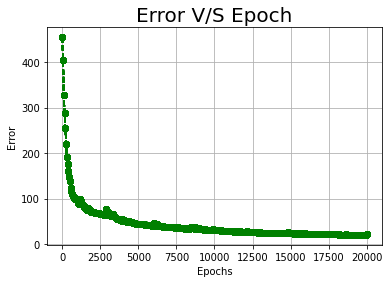

RMSE--Train: 0.2137789455812794
MSE--Train: 0.04570143757384362
Total Error--Train: 21.388272784558815

RMSE--Test: 0.23092648651821346
MSE--Test: 0.05332704217564662
Total Error--Test: 3.5995753468561467

************************ 6 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0282790892366223, 0.9525508940324079], [1.0273251988274876, 0.9171355293367335], [1.021573641619435, 0.8718628289928123], [1.0176558078968638, 0.8146157342488377], [1.0058670541263164, 0.7680575889457778], [0.9686205718043185, 0.6518354495655444], [0.9016935663845886, 0.5040790199609114], [0.7252976129830286, 0.14243592945277794], [0.7014567606420056, 0.07188926889426062], [0.670304508755441, 0.004582577028374724]]

Training with best hyperparameter found : 0.004582577028374724
Cofficients : [-2.42328544e-04 -2.90979252e-05 -1.79792978e-02  2.10699494e-01
 -2.23995792e-04 -2.37543103e-04  1.30250326e-01 -1.50053758e-02
  1.59634536e-01  1.24549618e-01 -4.82761643e

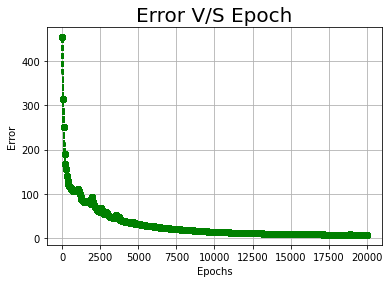

RMSE--Train: 0.12313112577374766
MSE--Train: 0.015161274134310464
Total Error--Train: 7.095476294857297

RMSE--Test: 0.13528604901222938
MSE--Test: 0.018302315057339327
Total Error--Test: 1.2354062663704046

************************ 7 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0266395598682587, 0.9173786258828747], [1.0190126302269693, 0.841559413511512], [1.001163770800616, 0.7379325035774623], [0.99017057683513, 0.7260309409161819], [0.9709020559719805, 0.6562644249618813], [0.9071127672542945, 0.5121895441265715], [0.8384059659810885, 0.3894814550555614], [0.7938646400506099, 0.30710215600932456], [0.7540044960474478, 0.23239407899698794], [0.6851870162891928, 0.08035210637140477]]

Training with best hyperparameter found : 0.08035210637140477
Cofficients : [ 1.51645586e-04 -1.37909540e-04 -1.87586443e-04  2.40119554e-01
 -1.57001127e-04 -1.96074489e-04  1.25145611e-01 -1.85871346e-04
  1.65231674e-01  1.19550406e-01 -1.64859611e-0

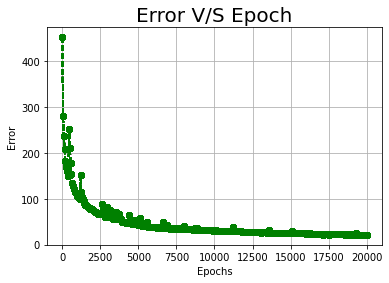

RMSE--Train: 0.2127022844322616
MSE--Train: 0.04524226180270272
Total Error--Train: 21.173378523664873

RMSE--Test: 0.22237577887283896
MSE--Test: 0.04945098702930178
Total Error--Test: 3.33794162447787

************************ 8 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0270546692310694, 0.9576040962473734], [1.0236739071816, 0.8854950737792279], [1.0170142302720113, 0.8317364778676022], [0.9749791448569292, 0.6515678618669957], [0.8149932760013628, 0.32670284165934094], [0.7737981133611083, 0.25249617775065314], [0.7706249345533986, 0.2599614374970699], [0.7475249907939973, 0.1994611211185333], [0.709804048863114, 0.138558676449402], [0.6352893929366179, 0.007779352675710283]]

Training with best hyperparameter found : 0.007779352675710283
Cofficients : [-2.03908785e-04 -7.20108068e-04 -2.34160163e-02  1.88684922e-01
 -1.99063426e-03 -4.10088830e-03  1.16091709e-01 -1.90510700e-02
  1.40988848e-01  1.03767961e-01 -4.46292123e-03 -

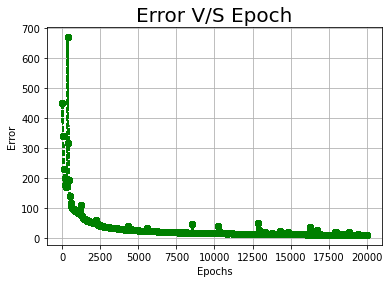

RMSE--Train: 0.15242980862896796
MSE--Train: 0.023234846558663796
Total Error--Train: 10.873908189454657

RMSE--Test: 0.17007322768118258
MSE--Test: 0.028924902773895367
Total Error--Test: 1.9524309372379371

************************ 9 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0285098808869575, 0.9944214684385095], [1.0169928966142052, 0.8231033488992859], [1.0136899450060117, 0.847612251211216], [1.0083227029513744, 0.7748017419719055], [1.003881469813726, 0.7634812457546506], [1.0009386124718966, 0.7380843214524895], [0.9502810948719408, 0.5920406411413411], [0.9152896491986181, 0.5189597424902609], [0.7881221465239202, 0.28829429360325076], [0.7842052904300801, 0.27113673238529723]]

Training with best hyperparameter found : 0.27113673238529723
Cofficients : [ 1.13854137e-05  1.32695774e-05  2.45615214e-05  2.15430198e-01
 -2.49774025e-05  1.96289810e-05  1.03870562e-01  2.05531657e-05
  1.49328478e-01  8.14236404e-02 -5.09657910e

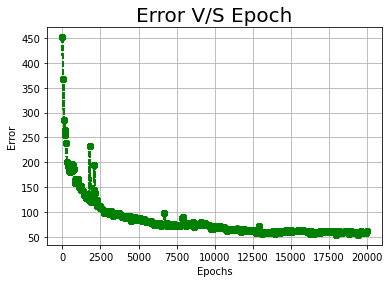

RMSE--Train: 0.359969844439341
MSE--Train: 0.12957828890568335
Total Error--Train: 60.6426392078598

RMSE--Test: 0.39039118935906436
MSE--Test: 0.15240528072918483
Total Error--Test: 10.287356449219976

************************ 10 DEGREE POLYNOMIAL************************
[rmse_validation_error , hyperparameter_value] : [[1.0242238067022997, 0.8848731463051602], [1.0131491393336982, 0.8111690542389459], [0.9655281361753738, 0.6450556169460753], [0.8368463294283794, 0.3753148517160865], [0.8357801746532023, 0.3684308735306606], [0.8325888288237905, 0.3694486628790007], [0.8058263610357123, 0.31286750947829156], [0.7945261243369538, 0.2813291228145447], [0.7572052736333079, 0.2044072126622657], [0.6539584092021354, 0.013806855664133089]]

Training with best hyperparameter found : 0.013806855664133089
Cofficients : [-1.09365985e-04 -3.91695639e-04 -2.30065863e-02  1.96157084e-01
 -1.99473174e-03 -3.86454128e-03  1.16142236e-01 -1.78942580e-02
  1.44748792e-01  1.04375243e-01 -6.05215438e-

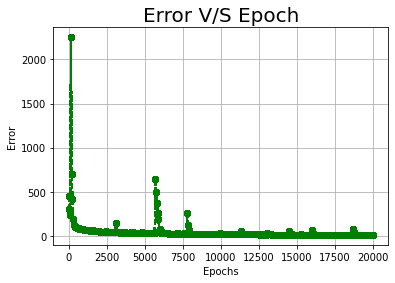

RMSE--Train: 0.15745453322928102
MSE--Train: 0.024791930034450762
Total Error--Train: 11.602623256122957

RMSE--Test: 0.17359528842877417
MSE--Test: 0.030135324164669297
Total Error--Test: 2.0341343811151775



In [ ]:
#training different degree polynomials
def training(df):

  #train validation test split
  df_train = df.iloc[0:936]
  df_validation = df.iloc[936:1203]
  df_test = df.iloc[1203:]
  x_train = np.array(df_train.iloc[:,:-1])
  y_train = np.array(df_train.iloc[:,-1])
  x_validation = np.array(df_validation.iloc[:,:-1])
  y_validation = np.array(df_validation.iloc[:,-1])
  x_test = np.array(df_test.iloc[:,:-1])
  y_test = np.array(df_test.iloc[:,-1])

  #hyperparameter tuning
  hyperparameter = np.random.uniform(0,1,10)
  accuracies_hyperparameter = list()
  for i in hyperparameter:
    stochasticgradientdescent_lasso_regressor.fit(x_train,y_train,0.000001,20000,i)
    y_pred_validation = stochasticgradientdescent_lasso_regressor.predict(x_validation)
    accuracies_hyperparameter.append([m.rmse(y_validation,y_pred_validation),i])
  accuracies_hyperparameter = sorted(accuracies_hyperparameter,key=lambda x : x[0],reverse=True)
  print("[rmse_validation_error , hyperparameter_value] : {}".format(accuracies_hyperparameter))
  best_hyperparameter = accuracies_hyperparameter[9][1]
  print("")

  #training using best regularization parameter
  print("Training with best hyperparameter found : {}".format(best_hyperparameter))
  stochasticgradientdescent_lasso_regressor.fit(x_train,y_train,0.0001,20000,best_hyperparameter)
  coef = stochasticgradientdescent_lasso_regressor.coef_()
  error_every_50_iteration = stochasticgradientdescent_lasso_regressor.error_every_50_iteration()
  #print('Error Every 50 Epochs : {}'.format(error_every_50_iteration))
  #print("")
  print('Cofficients : {}'.format(coef))
  epochs = [50*i for i in range(len(error_every_50_iteration))]
  plt.xlabel("Epochs")
  plt.ylabel("Error")
  plt.title("Error V/S Epoch",fontsize = 20)
  plt.plot(epochs,error_every_50_iteration,color='green',linestyle="--",marker='o')
  plt.grid(True)
  plt.show()

  #calculating accuracy for training dataset
  y_pred_train = stochasticgradientdescent_lasso_regressor.predict(x_train)
  #print(y_train)
  #print(y_pred_train)
  print('RMSE--Train: {}'.format(m.rmse(y_train,y_pred_train)))
  print('MSE--Train: {}'.format(m.mse(y_train,y_pred_train)))
  print('Total Error--Train: {}'.format(m.ssres(y_train,y_pred_train)))
  print("")

  #calculating accuracy for testing dataset
  y_pred_test = stochasticgradientdescent_lasso_regressor.predict(x_test)
  #print(y_test)
  #print(y_pred_test)
  print('RMSE--Test: {}'.format(m.rmse(y_test,y_pred_test)))
  print('MSE--Test: {}'.format(m.mse(y_test,y_pred_test)))
  print('Total Error--Test: {}'.format(m.ssres(y_test,y_pred_test)))
  print("")

print("************************ 1 DEGREE POLYNOMIAL************************")
training(df1)

print("************************ 2 DEGREE POLYNOMIAL************************")
training(df2)

print("************************ 3 DEGREE POLYNOMIAL************************")
training(df3)

print("************************ 4 DEGREE POLYNOMIAL************************")
training(df4)

print("************************ 5 DEGREE POLYNOMIAL************************")
training(df5)

print("************************ 6 DEGREE POLYNOMIAL************************")
training(df6)

print("************************ 7 DEGREE POLYNOMIAL************************")
training(df7)

print("************************ 8 DEGREE POLYNOMIAL************************")
training(df8)

print("************************ 9 DEGREE POLYNOMIAL************************")
training(df9)

print("************************ 10 DEGREE POLYNOMIAL************************")
training(df10)

# **Data Learning Using SKLearn Library**

In [ ]:
#train test split
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

## Polynomial Regression

In [ ]:
# -------------------------------------------- hyperparameter tuning using validation dataset------------------------------------------------------

#sklearn is a package -> linear_model is a library in that package -> LinearRegression is a class in linear_model library -> regressor is an object of LinearRegressor class , you can name it anything
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

#this fit() is a function in LinearRegression class, it does all the math for us which we learnt in the theory -> we are giving only two arguments as inputs rest are taken as default arguments and are also called hyperparemeters
regressor.fit(x_train,y_train)
print("")
print('linear model coeff (w): {}'.format(regressor.coef_))
print('linear model intercept (b): {}'.format(regressor.intercept_))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


linear model coeff (w): [3.40675699e-17 0.00000000e+00 1.00000000e+00]
linear model intercept (b): -6.591949208711867e-17


In [ ]:
# ------------------------------ testing model using both training and testing dataset----------------------------------------
#predict() is a function in LinearRegresson class which helps us to predict to values based on the line of best fit that we attained internally using fit() function
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("-----------------training evaluation metrics--------------------")
y_pred_train = regressor.predict(x_train)
print("rmse = {}".format(np.sqrt(mean_squared_error(y_train, y_pred_train))))
print("r2_score = {}".format(r2_score(y_train,y_pred_train)))
print("")

print("-----------------testing evaluation metrics----------------------")
y_pred_test = regressor.predict(x_test)
print("rmse = {}".format(np.sqrt(mean_squared_error(y_test, y_pred_test))))
print("r2_score = {}".format(r2_score(y_test,y_pred_test)))


-----------------training evaluation metrics--------------------
rmse = 7.348565096022073e-16
r2_score = 1.0

-----------------testing evaluation metrics----------------------
rmse = 7.048555995405275e-16
r2_score = 1.0


In [ ]:
#----------------------------------------- training model using best learnt hyperparameter using training dataset---------------------------------
from sklearn.model_selection import cross_val_score
cross_validation_accuracies = cross_val_score(regressor,x_train,y_train,scoring = "neg_mean_squared_error",cv=5)
print(cross_validation_accuracies)
print("Mean = {}".format(np.mean(cross_validation_accuracies)))

[-8.14565923e-32 -2.47194653e-31 -2.52719085e-32 -1.47643643e-31
 -2.80454536e-32]
Mean = -1.0592245022515714e-31


## Polynomial Regression with Ridge Regulariser


In [ ]:
#------------------------ using grid search for parameter tuning ------------------------
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {"alpha":[1e-8,1e-5,1e-2,1,10,100]}

ridge_regressor = GridSearchCV(ridge,parameters,scoring = "neg_mean_squared_error",cv=5)
ridge_regressor.fit(x_train,y_train)
print("")
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)
print("")
ridge_y_test_pred = ridge_regressor.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 1e-05, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)


{'alpha': 1e-08}
-1.7530325909245633e-22



## Polynomial Regression with Lasso Regulariser

In [ ]:
#------------------------ using grid search for parameter tuning ------------------------
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

lasso = Lasso()
parameters = {"alpha":[1e-8,1e-5,1e-2,1,10,100]}

lasso_regressor = GridSearchCV(lasso,parameters,scoring = "neg_mean_squared_error",cv=5)
lasso_regressor.fit(x_train,y_train)
print("")
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)
lasso_y_test_pred = lasso_regressor.predict(x_test)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-08, 1e-05, 0.01, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)


{'alpha': 1e-08}
-5.496480566813429e-13
